In [1]:
import sys
sys.path.insert(0, '../../')
sys.path.insert(0, '../../python_src/')

import numpy as np
import scipy as sp
import numpy.random as rand
import numpy.linalg as la
import pandas as pd
import scipy.optimize as spo
import scipy.interpolate as spi
import scipy.integrate as spint
import scipy.sparse as sparse
import cPickle as pickle
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import matplotlib as mpl
import itertools as it
import time
import curve_fitting as curve



mpl.rcParams['mathtext.fontset'] = 'cm'
# mpl.rcParams['figure.dpi'] = 200
sns.set(color_codes=True)
sns.set_context('talk', font_scale=1.75)
sns.set_palette("hls", 9)
# sns.set_palette("muted", 8)
sns.set_style('ticks', {'xtick.direction': 'in','ytick.direction': 'in', 'axes.linewidth': 2.0})

In [2]:
def mcResample(x, y, w, n_params, measure_func, args=[], dist="gauss", nresample=100, plot=False):
        
    p = np.zeros([n_params, nresample], float)
        
    x = np.array(x, float)
    y = np.array(y, float)
    w = np.array(w, float)
        
    for i in range(nresample):
        print i
        
        if dist=="guass":
            w_tmp = np.copy(w)
            w_tmp[w_tmp <= 0.0] = 1.0
            y_tmp = np.array(rand.normal(loc=y, scale=w_tmp))
            
            
        
        else:
            w_tmp = np.copy(w)
            y_tmp = rand.binomial(w_tmp.astype(int), y)
            
        p[:, i] = measure_func(x, y_tmp, w_tmp, *args)
           
    
    if plot:
    
        fig, axes = plt.subplots(1, n_params, figsize=(24, 8))
        for i in range(n_params):
            sns.distplot(p[i], ax=axes[i], rug=True, rug_kws={"color": "g"},
                         kde_kws={"color": "k", "lw": 3},
                         hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})
        plt.show()
    
    return np.mean(p, axis=1), np.std(p, axis=1), sp.stats.skew(p, axis=1)


# fn = "tune_disc_1D_edge_default"
# fn = "tune_disc_2D_edge_slice"

# fn = "tune_disc_1D_nodepair_default"
# fn = "tune_disc_2D_nodepair_default"

fn = "tune_disc_2D_edge_constraint_thresh"
# fn = "tune_disc_2D_edge_lower_DZ"
# fn = "tune_disc_2D_edge_triangular"
# fn = "tune_disc_2D_global_shear"
# fn = "tune_disc_2D_global_compress"


-1.5 8.0


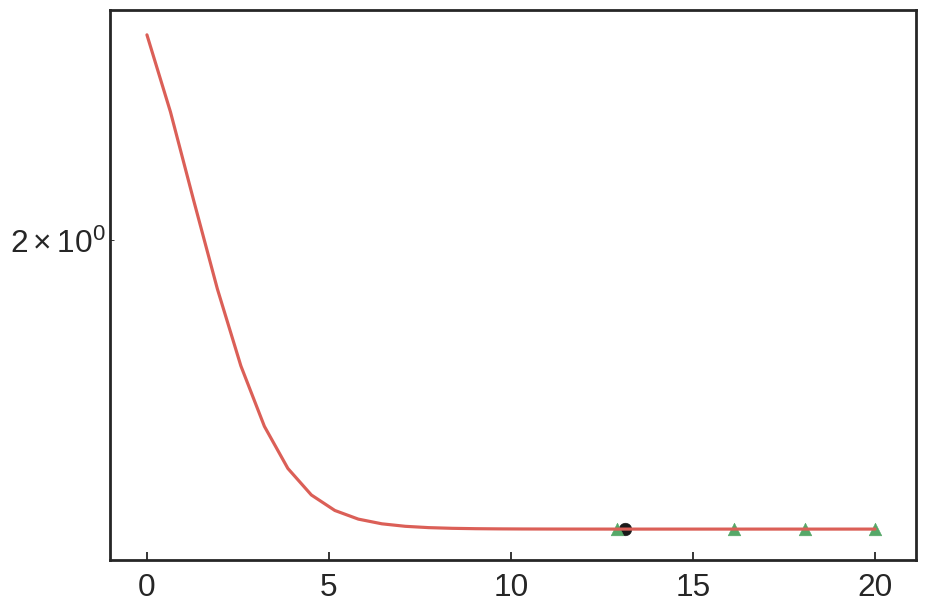

Lambda: 13.139293784 508537.269067
Residuals 35.5005407497 35.5005918539
Smoothness 8.62198520478e-09 1.40074746454e-13
1568.526 ms
2.62830624677 1.60551197708
0
1
2
3
4
5
6
7
[ 2.60392205  1.64299887]
[ 0.06580004  0.11921306]
-1.5 16.0


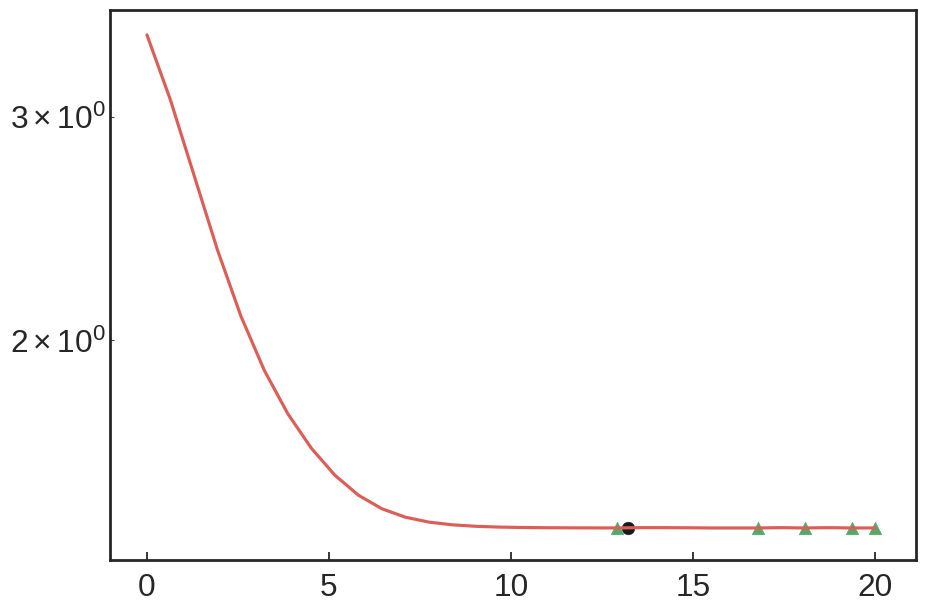

Lambda: 13.2194458344 550975.616756
Residuals 33.3290604156 33.3293460779
Smoothness 4.8115838988e-08 1.28358253219e-12
1527.339 ms
5.14842304309 2.93005161011
0
1
2
3
4
5
6
7
[ 5.14834614  2.93624148]
[ 0.09682592  0.1566625 ]
-1.5 32.0


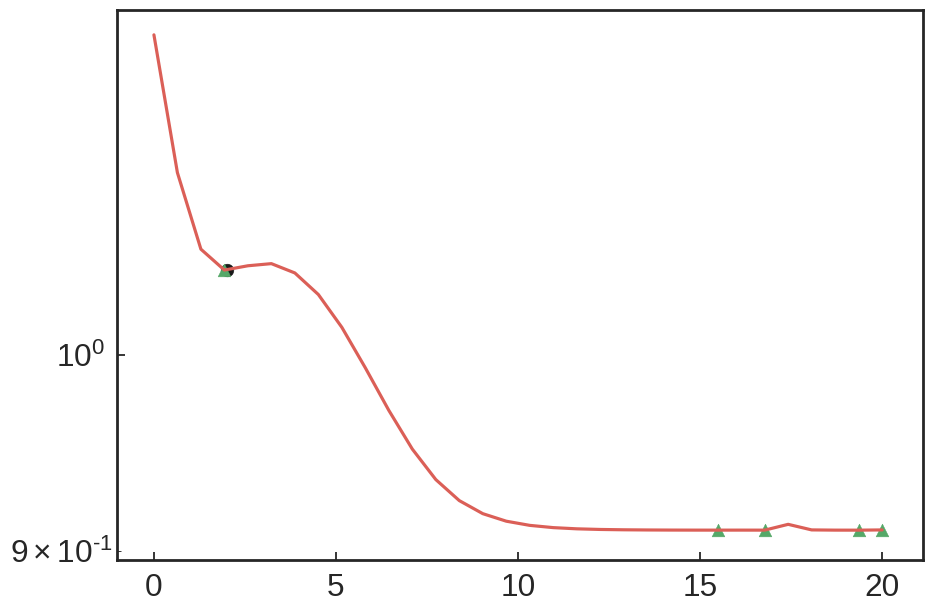

Lambda: 2.00463221498 7.42336319287
Residuals 35.0577710487 34.8989435822
Smoothness 2.92715023979e-07 0.00669453774571
1918.082 ms
7.8718301021 5.0842012901
0
1
2
3
4
5
6
7
[ 7.74892207  4.95122589]
[ 0.09934847  0.26387953]
-1.5 64.0


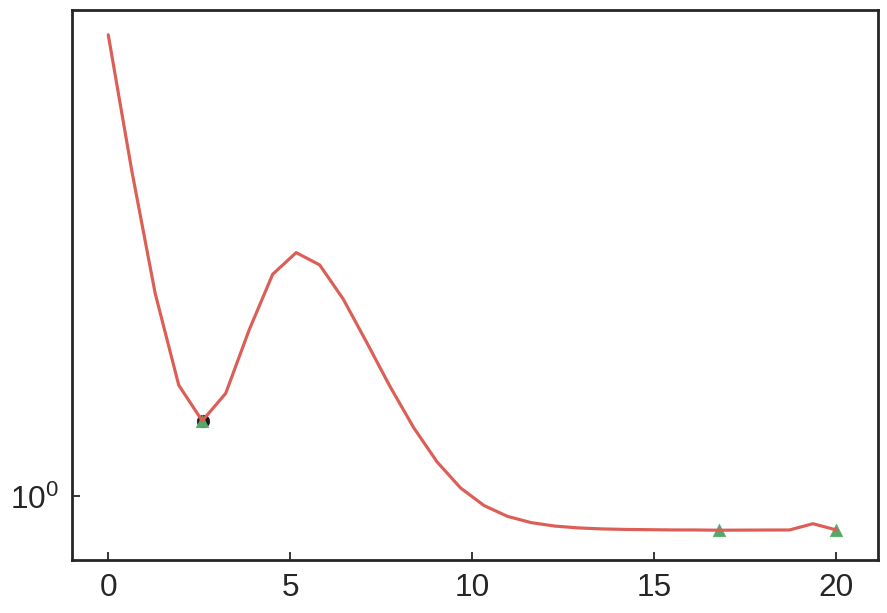

Lambda: 2.60629597492 13.5487727995
Residuals 39.334367339 39.1319889326
Smoothness 6.24721031729e-07 0.00431158799922
1866.623 ms
11.2400492072 9.28451311348
0
1
2
3
4
5
6
7
[ 11.24242296   8.64237475]
[ 0.23115526  0.50500329]
-1.5 128.0


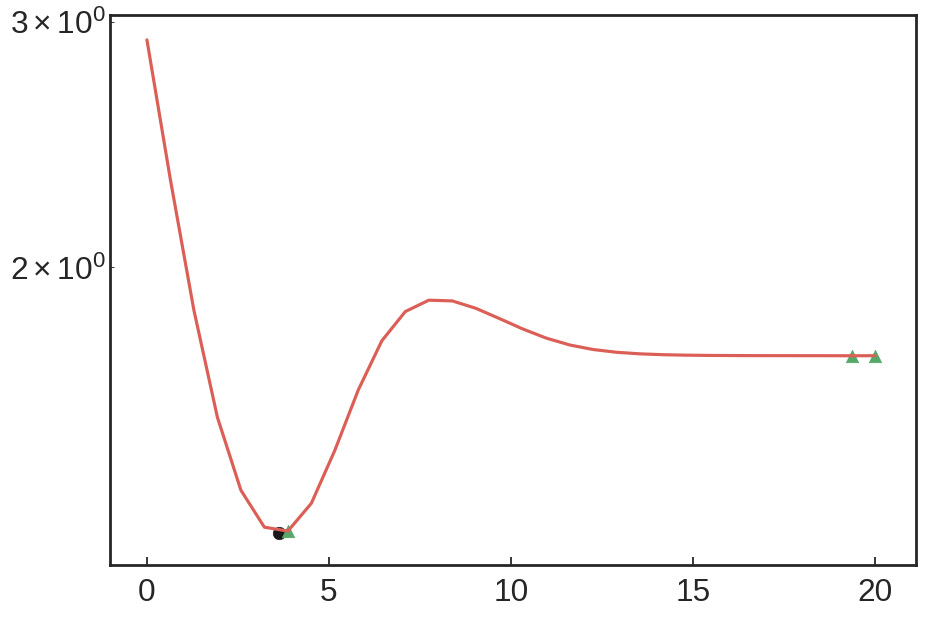

Lambda: 3.62651768174 37.5817169849
Residuals 52.1701719448 51.6741201289
Smoothness 9.36223847177e-06 0.00279158273229
1826.148 ms
16.8491811831 17.3898826569
0
1
2
3
4
5
6
7
[ 16.64430444  16.93213177]
[ 0.58781192  1.10048236]
-1.5 256.0


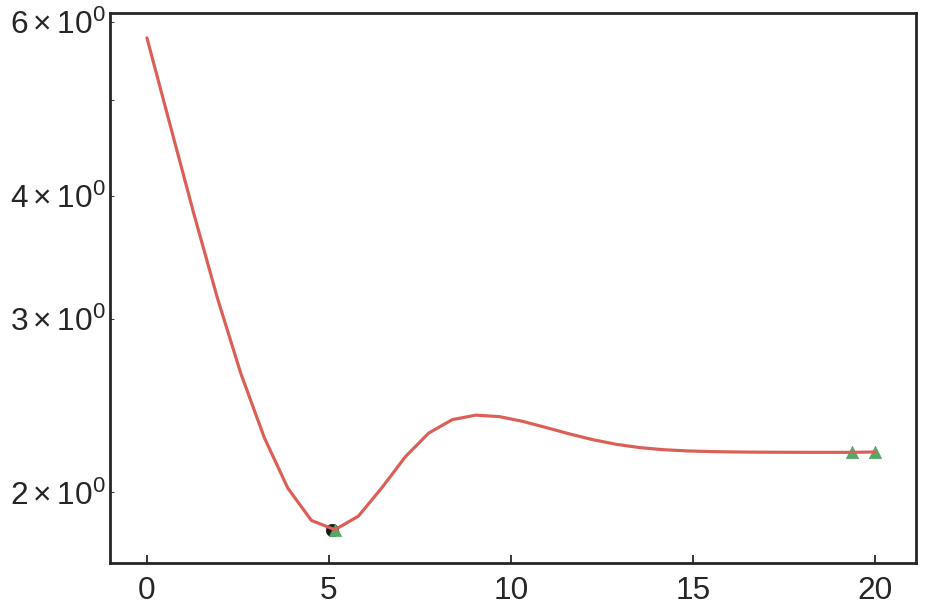

Lambda: 5.08628597051 161.787859936
Residuals 50.1265230763 49.6506306629
Smoothness 2.91114231424e-05 0.000926233806565
2251.980 ms
25.8289664781 29.1022576798
0
1
2
3
4
5
6
7
[ 26.29324904  27.79566182]
[ 0.96019186  1.15480924]
-1.5 512.0


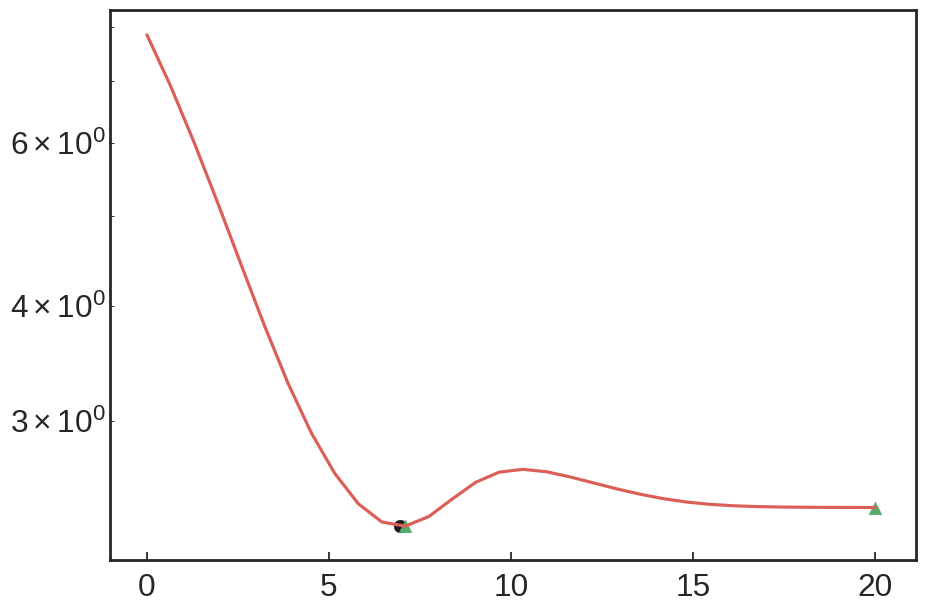

Lambda: 6.9535598483 1046.86980049
Residuals 48.307424903 48.1578575421
Smoothness 4.46163859102e-05 0.000130956196082
2811.398 ms
44.4002219576 50.1993449932
0
1
2
3
4
5
6
7
[ 44.06356719  46.16003699]
[ 1.12091395  3.5998842 ]
-1.0 8.0


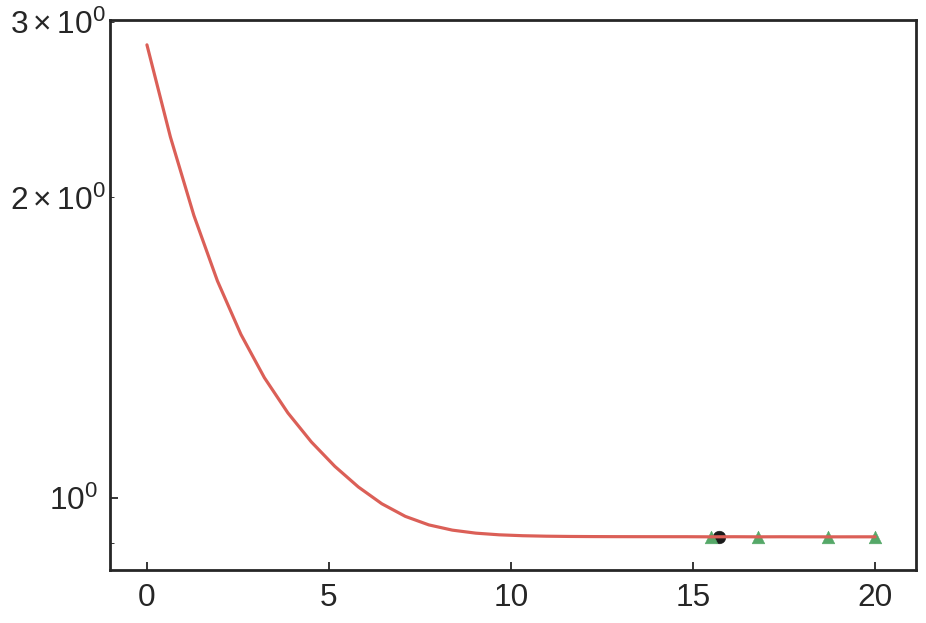

Lambda: 15.7185856329 6706485.7123
Residuals 44.7664190562 44.7665550515
Smoothness 2.27241680611e-08 1.16201321835e-14
1551.244 ms
13.5804222719 4.95971644673
0
1
2
3
4
5
6
7
[ 13.54191396   4.91570781]
[ 0.12034577  0.15356588]
-1.0 16.0


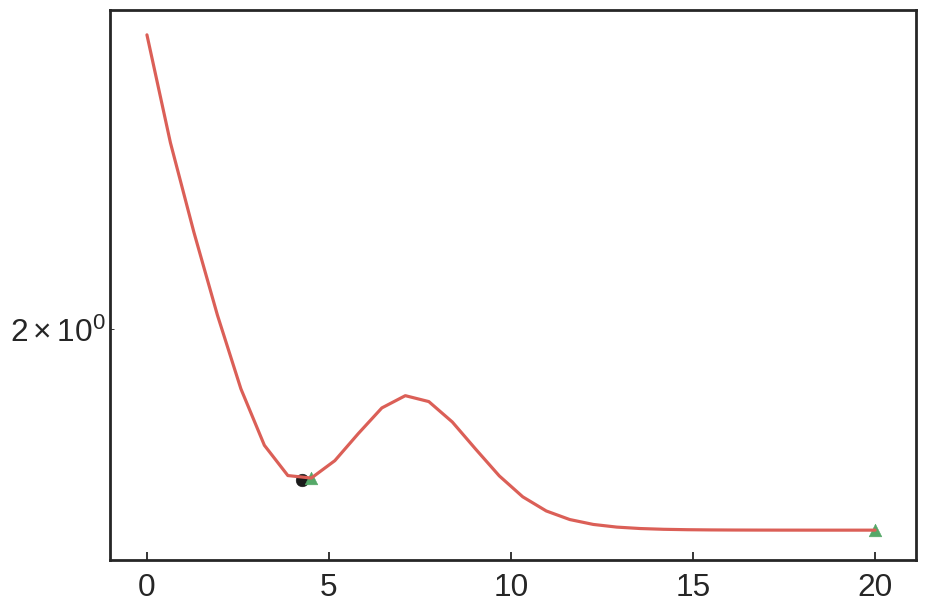

Lambda: 4.24764170037 69.9402775739
Residuals 43.5612025124 43.3567217461
Smoothness 4.0192617439e-06 0.000940184634891
1601.863 ms
25.8242689149 10.293271605
0
1
2
3
4
5
6
7
[ 25.63423748  10.49334179]
[ 0.24932359  1.09688075]
-1.0 32.0


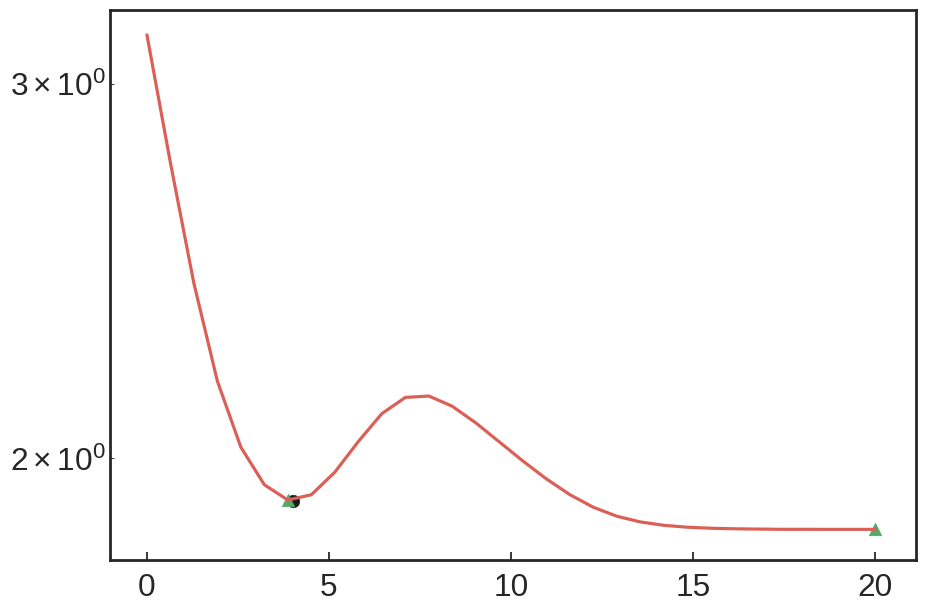

Lambda: 4.02334977338 55.8880047682
Residuals 43.0508712896 42.5588595318
Smoothness 1.3506978239e-05 0.00235373623255
1851.360 ms
41.9253765371 22.6147476149
0
1
2
3
4
5
6
7
[ 41.58631874  22.29784952]
[ 0.83436033  0.70718481]
-1.0 64.0


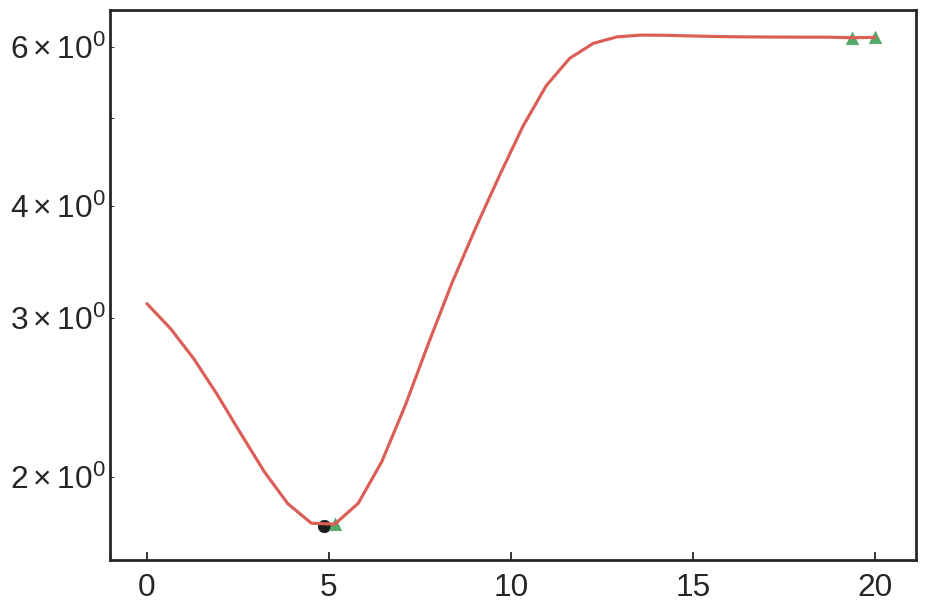

Lambda: 4.87136334546 130.498710497
Residuals 40.23282829 39.4086436863
Smoothness 0.000156786155594 0.00152549012985
2354.863 ms
46.4826568757 43.9254433536
0
1
2
3
4
5
6
7
[ 46.35723822  43.97525239]
[ 1.49814821  1.76596531]
-1.0 128.0


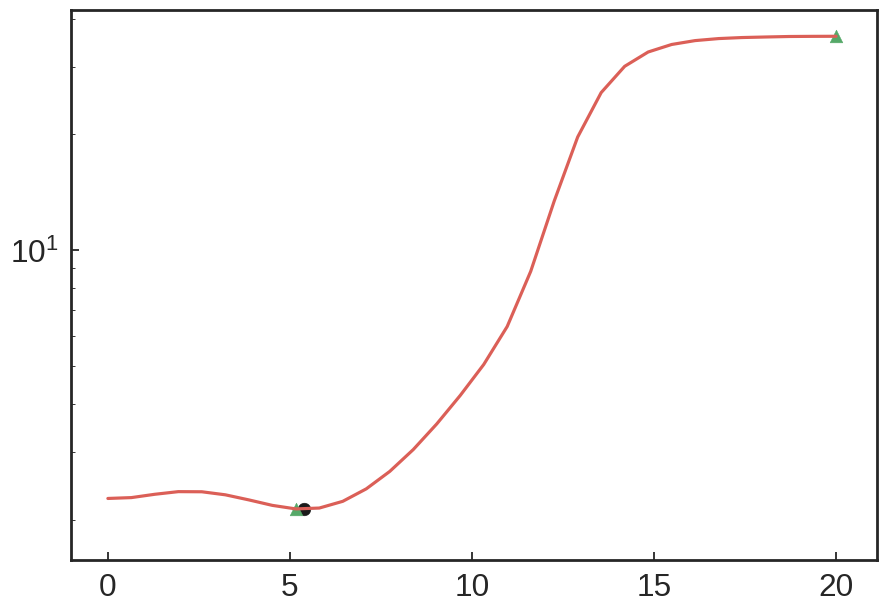

Lambda: 5.38791025909 218.745785571
Residuals 34.3233820476 33.7121038118
Smoothness 0.000193573953497 0.000979030236785
2691.602 ms
49.1115847515 50.3848708386
0
1
2
3
4
5
6
7
[ 52.39474238  45.86095917]
[ 5.88096556  3.17469494]
-1.0 256.0


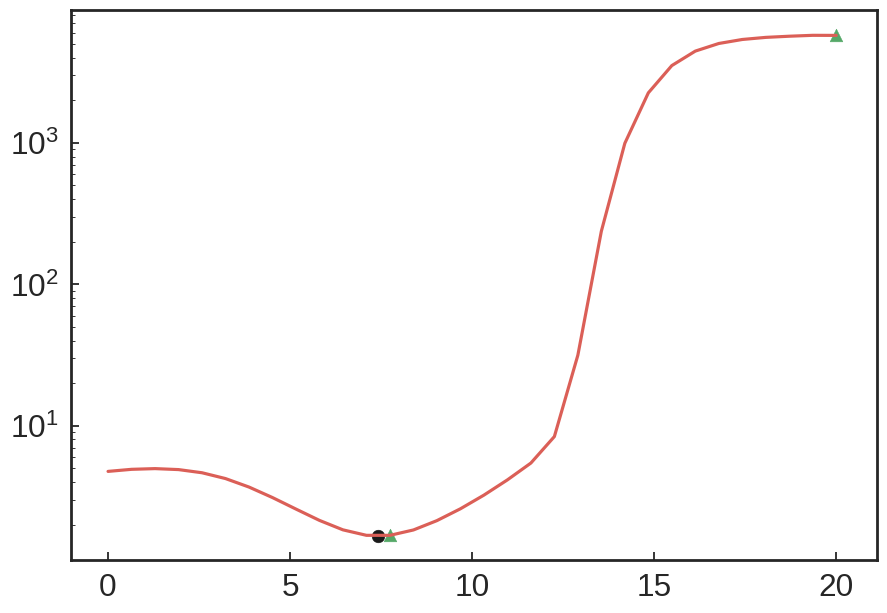

Lambda: 7.41995464018 1668.95780241
Residuals 27.2158137956 27.1180392424
Smoothness 0.00013114952661 0.000174776684249
3493.532 ms
63.3224157984 40.3748584375
0
1
2
3
4
5
6
7
[ 62.56558175  38.11475252]
[ 1.50537285  3.05388935]
-1.0 512.0


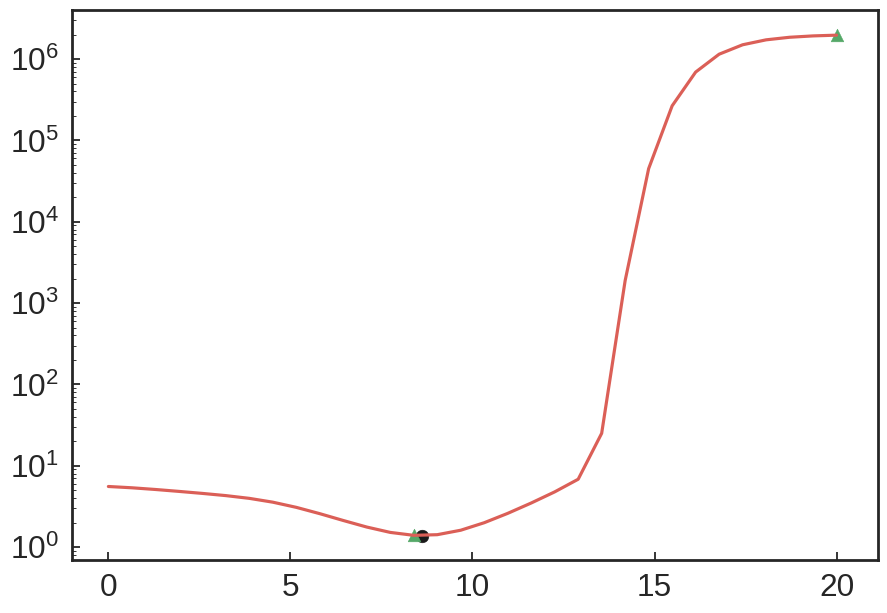

Lambda: 8.60528676473 5460.45153878
Residuals 22.8810308531 22.9358468169
Smoothness 6.86721323713e-05 5.52157953196e-05
5099.884 ms
81.9484613312 41.3526183882
0
1
2
3
4
5
6
7
[ 81.84157122  41.91966704]
[ 1.5083688   2.29718955]
-0.5 8.0


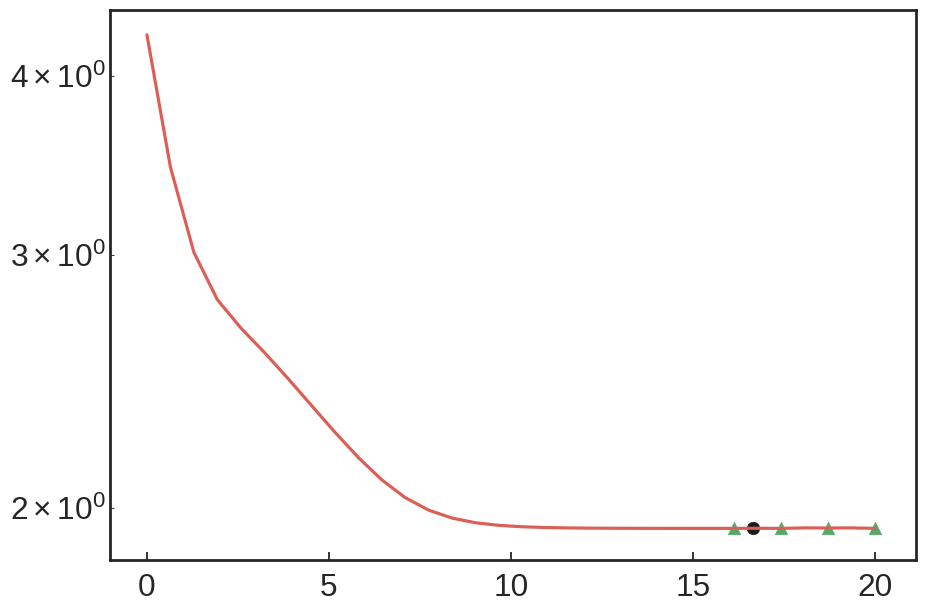

Lambda: 16.6542185115 17093665.4533
Residuals 47.7745889814 47.7765081058
Smoothness 3.20985077579e-07 -2.90680743279e-14
1576.584 ms
12.3525605797 4.87574498529
0
1
2
3
4
5
6
7
[ 12.47454735   4.97025374]
[ 0.20730885  0.30360645]
-0.5 16.0


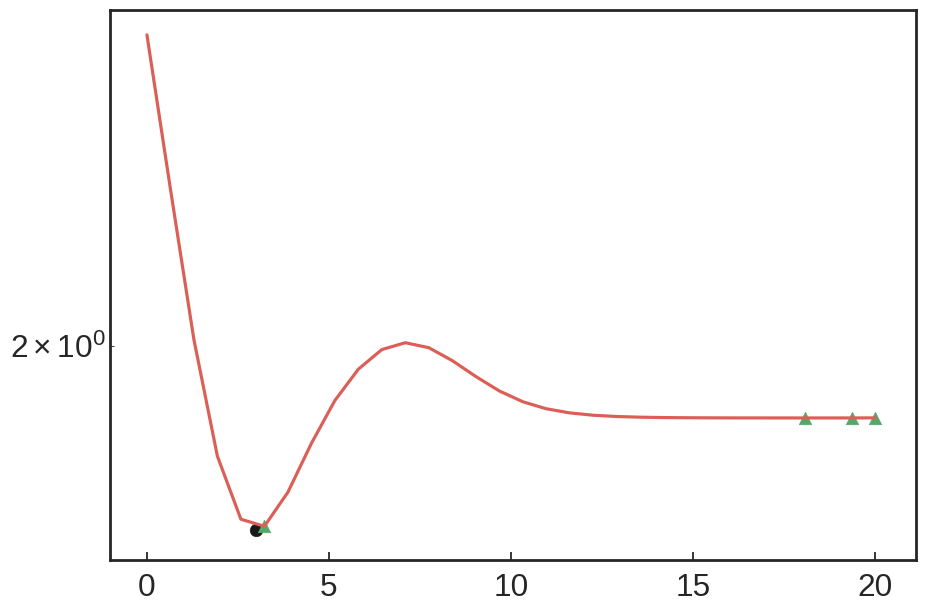

Lambda: 2.98495354197 19.7855830158
Residuals 44.153826568 43.5964833724
Smoothness 6.39921640042e-06 0.00662089160607
1542.056 ms
19.5428907333 10.4731286932
0
1
2
3
4
5
6
7
[ 19.48092582  10.00960905]
[ 0.47407441  0.77310003]
-0.5 32.0


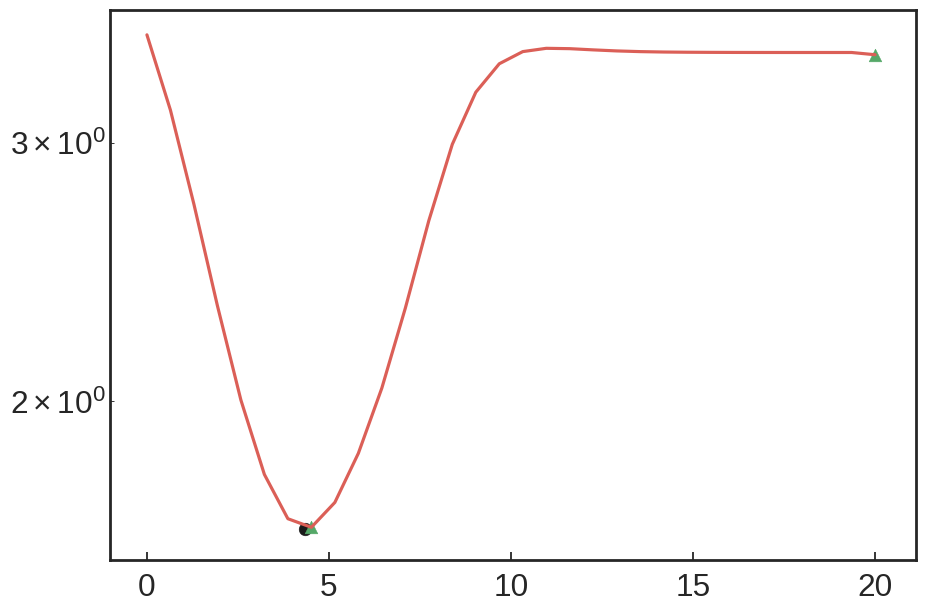

Lambda: 4.34548317948 77.1292957705
Residuals 37.8435500838 37.0934962805
Smoothness 5.98562780576e-05 0.00202036349338
1846.331 ms
26.0956354503 16.2340375769
0
1
2
3
4
5
6
7
[ 26.35299131  15.86682321]
[ 0.47450521  0.5404289 ]
-0.5 64.0


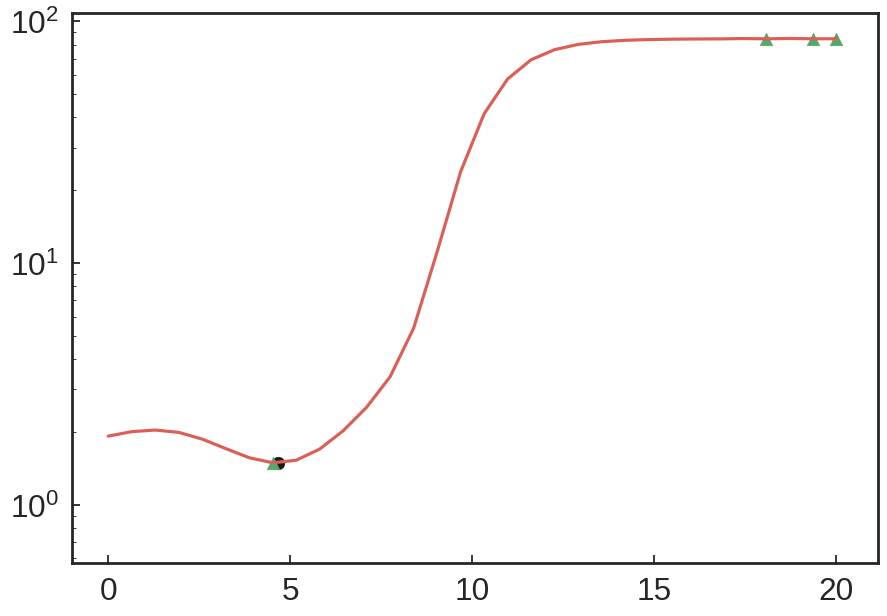

Lambda: 4.65294198426 104.893126008
Residuals 29.5928623556 28.5142076529
Smoothness 0.00024695682859 0.00198023854199
2468.025 ms
30.7048134139 15.0058856251
0
1
2
3
4
5
6
7
[ 31.00251654  14.94283209]
[ 0.26759157  0.86118765]
-0.5 128.0


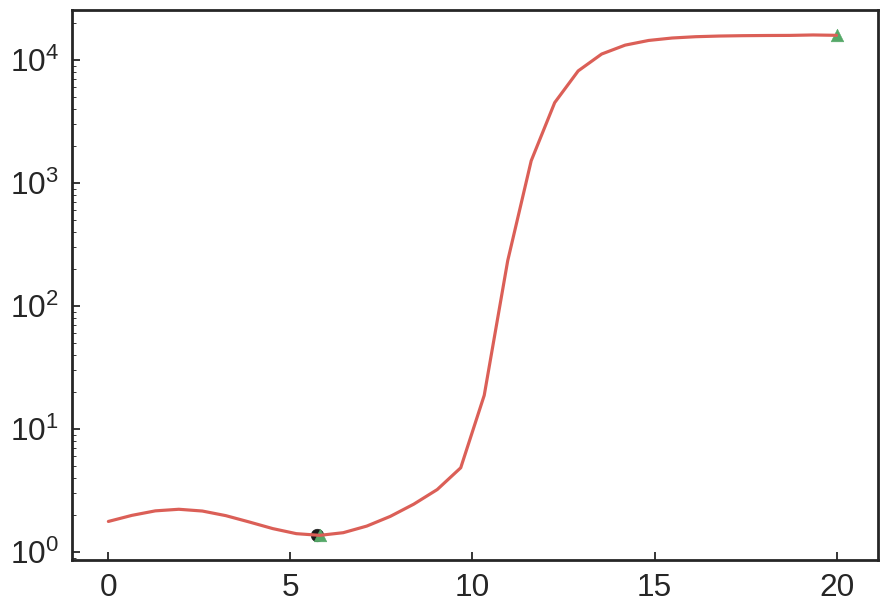

Lambda: 5.74059418745 311.249296472
Residuals 23.9314182447 23.4671708239
Smoothness 0.000241543401728 0.000694756391731
3076.734 ms
41.9186134227 18.0581085753
0
1
2
3
4
5
6
7
[ 42.0104974   18.06973556]
[ 0.53599131  0.74652472]
-0.5 256.0


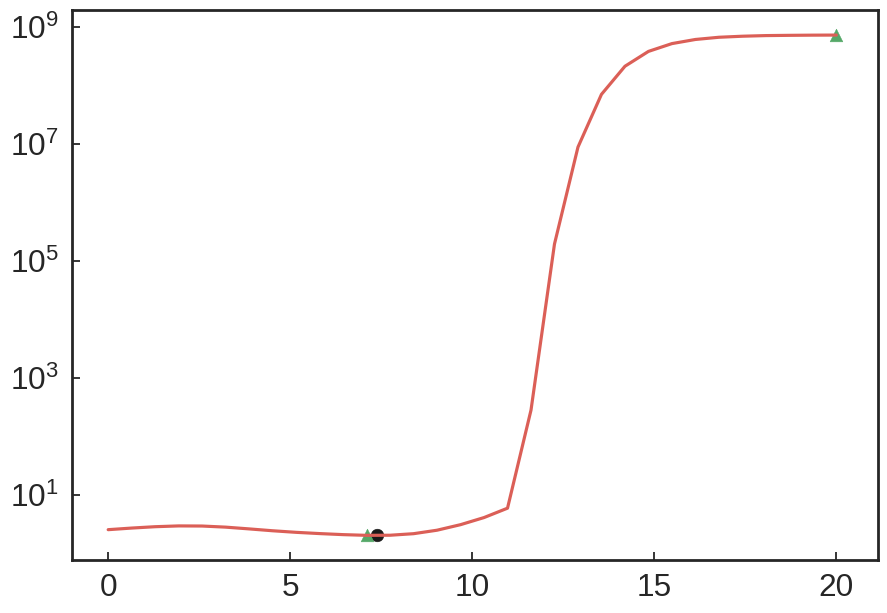

Lambda: 7.37731689384 1599.29293325
Residuals 19.9652068851 19.8794979318
Smoothness 0.000126861851282 0.000166002037395
3612.662 ms
59.1290725443 24.7607769411
0
1
2
3
4
5
6
7
[ 59.29531723  24.13981111]
[ 0.88361054  0.84007218]
-0.5 512.0


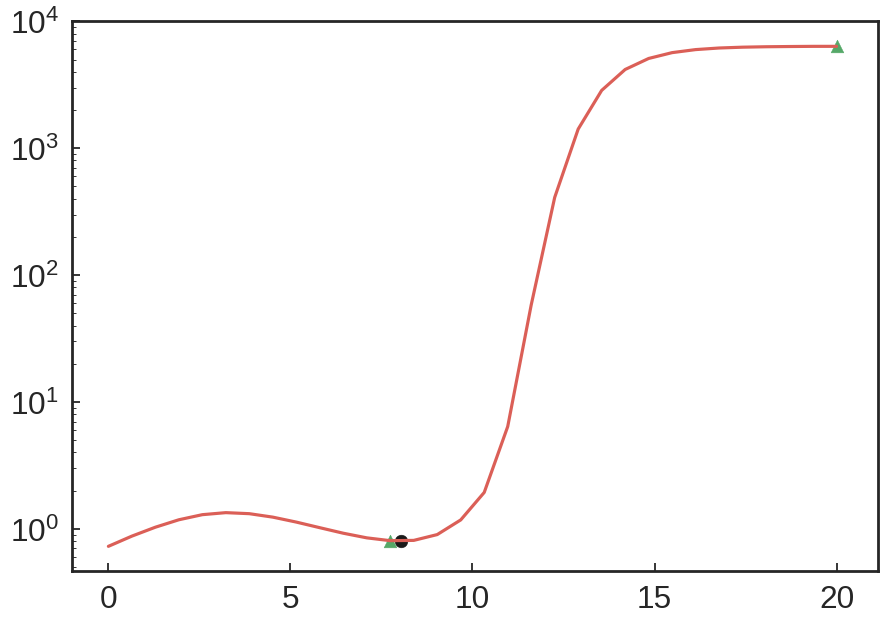

Lambda: 8.03342185422 3082.27072964
Residuals 19.0215855033 19.0229552275
Smoothness 5.31488376902e-05 5.2696974956e-05
4072.195 ms
82.279596458 33.8548247453
0
1
2
3
4
5
6
7
[ 82.39167447  34.6201549 ]
[ 1.15855195  1.09896253]
1.0 8.0


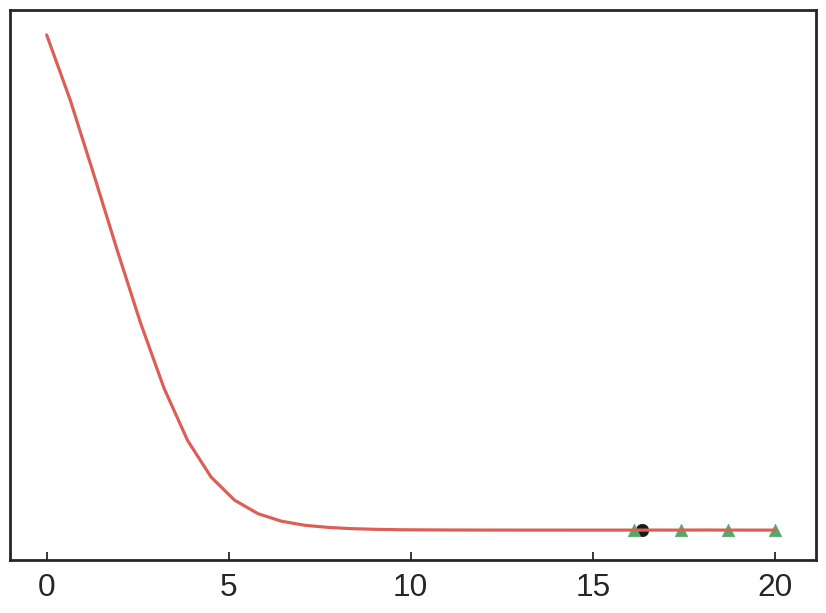

Lambda: 16.3651002356 12801849.8191
Residuals 20.1008599568 20.100950309
Smoothness 1.51529923657e-08 -4.15835443336e-13
1408.871 ms
3.35407122363 1.75795255205
0
1
2
3
4
5
6
7
[ 3.35240004  1.76533817]
[ 0.05927048  0.15364833]
1.0 16.0


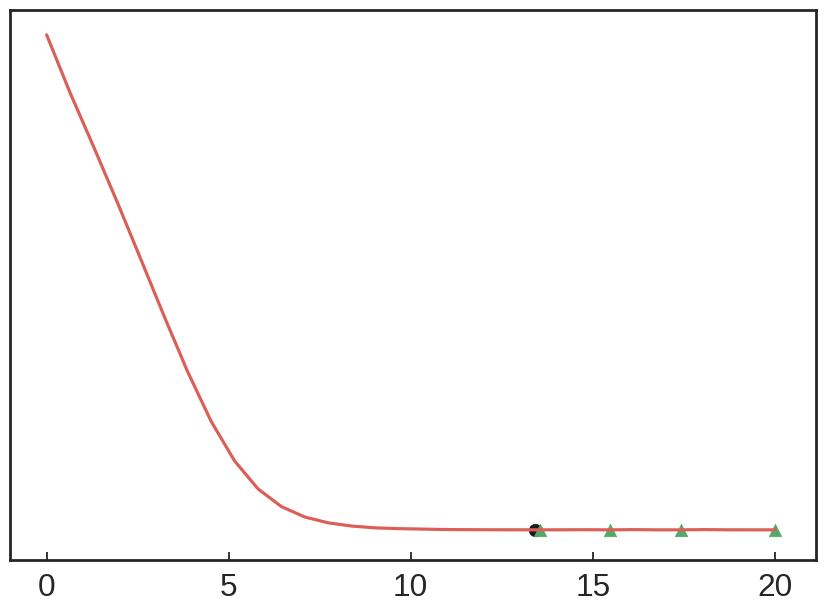

Lambda: 13.4134252077 668923.650423
Residuals 27.8502325667 27.8504789624
Smoothness 4.14806137896e-08 8.45167017528e-13
1485.412 ms
4.67156525053 2.41871556326
0
1
2
3
4
5
6
7
[ 4.64678851  2.39078469]
[ 0.08086687  0.07866014]
1.0 32.0


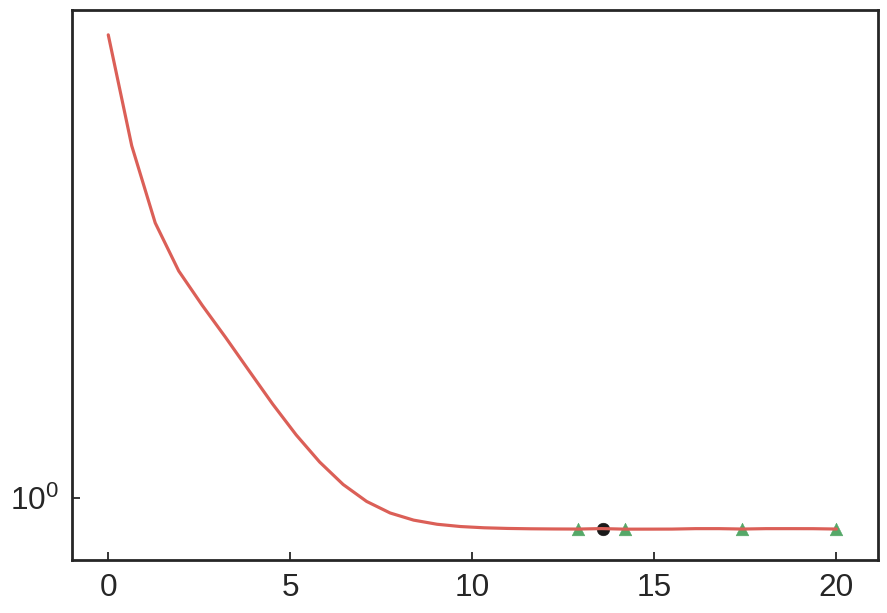

Lambda: 13.5977122867 804287.673245
Residuals 30.2642408916 30.264587373
Smoothness 5.82981389556e-08 7.80785324027e-13
1763.788 ms
6.9866216594 4.00880086928
0
1
2
3
4
5
6
7
[ 6.92926808  3.99145409]
[ 0.11769127  0.15344402]
1.0 64.0


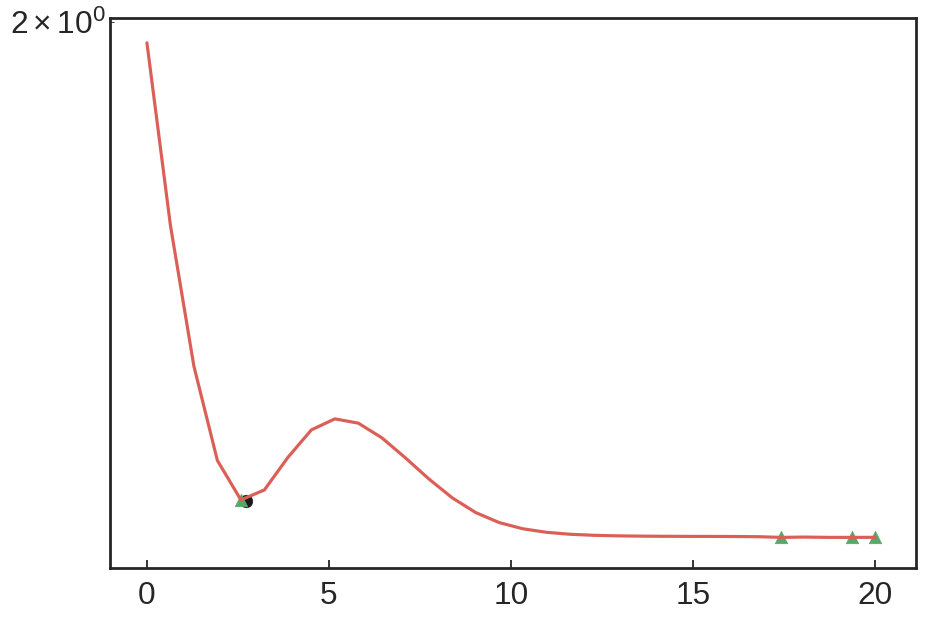

Lambda: 2.73470412866 15.405184809
Residuals 44.7062919715 44.4388225509
Smoothness 1.03495957872e-06 0.00519125612138
1469.268 ms
11.0321301604 7.20509538397
0
1
2
3
4
5
6
7
[ 11.04811265   6.88814794]
[ 0.2633974   0.43221489]
1.0 128.0


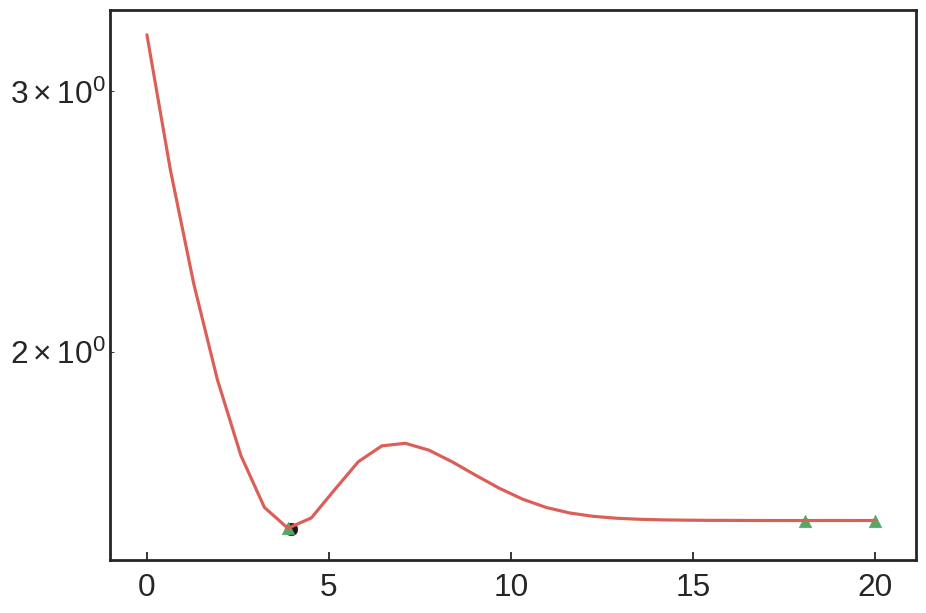

Lambda: 3.9553138242 52.212076787
Residuals 43.424287544 43.0848671281
Smoothness 4.31362129456e-06 0.00192654162236
1853.112 ms
19.282840728 13.6695384255
0
1
2
3
4
5
6
7
[ 19.17475349  12.43733923]
[ 0.46222161  0.82884915]
1.0 256.0


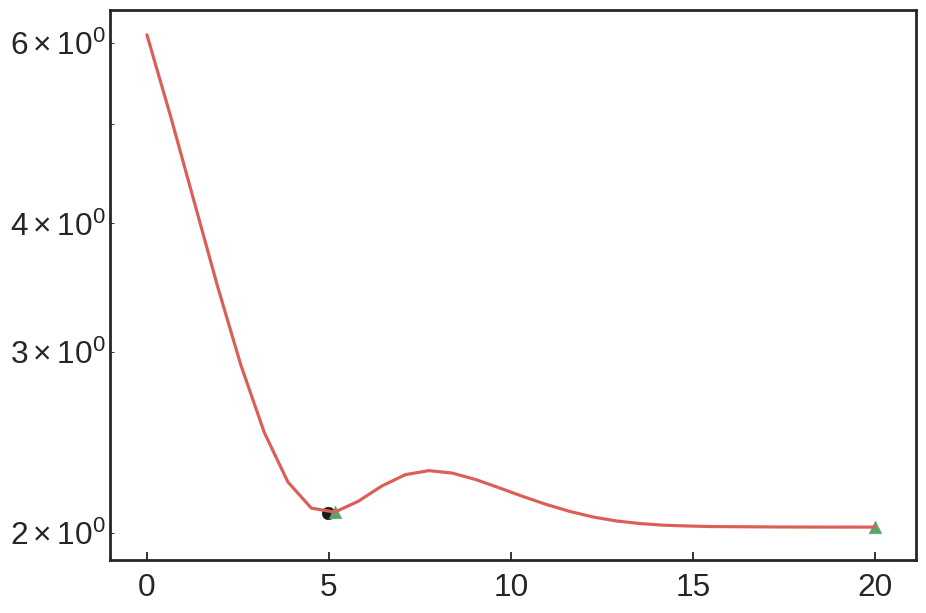

Lambda: 4.96080163616 142.708150069
Residuals 39.6465158009 39.3005624228
Smoothness 1.30001930709e-05 0.000827734354868
2317.061 ms
32.3377605078 23.318799596
0
1
2
3
4
5
6
7
[ 31.82436149  21.52608794]
[ 0.62426748  1.71314525]
1.0 512.0


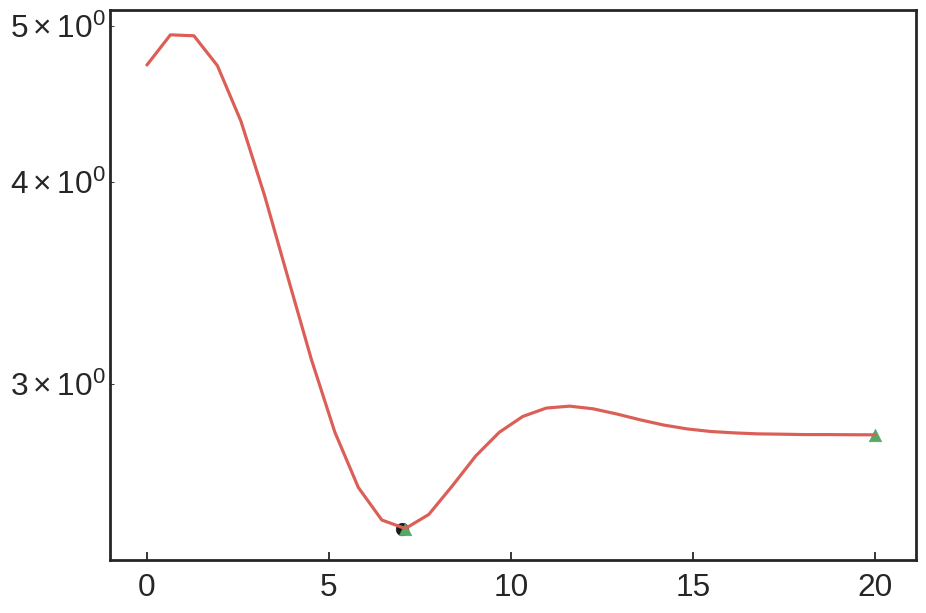

Lambda: 7.00471629709 1101.81742186
Residuals 37.2967531552 37.1387388725
Smoothness 5.10915225349e-05 0.00013990648271
2874.414 ms
51.0214872303 42.4384265872
0
1
2
3
4
5
6
7
[ 51.36251094  40.51516929]
[ 0.8075777  2.5657996]


In [7]:

with open("{}.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df = data['df']
#     df = data['df'].query('NN == 2048')


df_fsat = pd.DataFrame(columns=['Delta', 'NN', 'NTc', 'NTc_err', 'width', 'width_err', 'fit_func'], dtype=float)

def measure_func(NT, nsat, count):
    spline = curve.curveFitSpline(NT, nsat, count, CV=True, lam0=8, dist="binom")
    
    NTc, width = curve.calcTransition(spline, np.min(NT), np.max(NT))
    
    return np.array([NTc, width])


for (Delta, NN), group in df.groupby(['eta', 'NN']):

    print Delta, NN

    NT = np.array(group['NTS'])
    count = np.array(group['count'])
    fsat = np.array(group['fsat'])


    time1 = time.time()
    spline = curve.curveFitSpline(NT, fsat*count, count, CV=True, lam0=8, dist="binom", verbose=True, plot=True)
    time2 = time.time()

    print '{:.3f} ms'.format((time2-time1)*1000.0)
        
    NTc, width = curve.calcTransition(spline, np.min(NT), np.max(NT))
    
    print NTc, width
    
    avg, std, skew = mcResample(NT, fsat, count, 2, measure_func, dist="binom", nresample=8, plot=False)
    
    
    print avg
    print std
    
    
    
    row = pd.Series({'Delta': Delta, 'NN': NN, 'NTc': NTc, 'NTc_err': std[0], 
                     'width': width, 'width_err': std[1], 'fit_func': spline})
    
    
#     row = pd.Series({'Delta': Delta, 'NN': NN,'fit_func': spline})


    df_fsat = df_fsat.append(row, ignore_index=True)


with open("{}_fsat_fit.pkl".format(fn), 'w') as pkl_file:
    data = {'df': df_fsat}
    
    pickler = pickle.Pickler(pkl_file, -1)
        
    pickler.dump(data)
    


In [15]:
with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df']
    
    
df_pow = pd.DataFrame(columns=['Delta', 'NTc_fit_func', 'NTc_fit_param', 'NTc_fit_param_err',
                              'width_fit_func', 'width_fit_param', 'width_fit_param_err'], dtype=float)

# def pow_law(x, A, B, C):
#     return A + B * x**C

# def pow_law(x, B, C):
#     return B * x**C

def pow_law(x, A, B, C, D, E):
    return A + B * x**C * (1.0 + D*x**E)
    
for Delta, group in df_fit.groupby(['Delta']):
    
    NN = np.array(group['NN'])

    NTc = np.array(group['NTc'])
    NTc_err = np.array(group['NTc_err'])


#     NTc_fit_param, std = spo.curve_fit(pow_law, NN, NTc, 
#                              p0=[0, 1, 1], 
#                              sigma=NTc_err, 
#                              absolute_sigma=True, maxfev=10000, 
#                              bounds=([-np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf]))
    
#     NTc_fit_param, std = spo.curve_fit(pow_law, NN, NTc, 
#                              p0=[1, 1], 
#                              sigma=NTc_err, 
#                              absolute_sigma=True, maxfev=10000, 
#                              bounds=([-np.inf, -np.inf], [np.inf, np.inf]))


    NTc_fit_param, std = spo.curve_fit(pow_law, NN, NTc, 
                             p0=[0, 1, 1, 1, 1], 
                             sigma=NTc_err, 
                             absolute_sigma=True, maxfev=10000, 
                             bounds=([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf], 
                                     [np.inf, np.inf, np.inf, np.inf, np.inf]))
    

    print NTc_fit_param
    
    
    width = np.array(group['width'])
    width_err = np.array(group['width_err'])
        
    width_fit_param, std = spo.curve_fit(pow_law, NN, width, 
                             p0=[0, 1, 1, 1, 1], 
                             sigma=NTc_err, 
                             absolute_sigma=True, maxfev=10000, 
                             bounds=([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf], 
                                     [np.inf, np.inf, np.inf, np.inf, np.inf]))
    
    
#     width_fit_param, std = spo.curve_fit(pow_law, NN, width, 
#                              p0=[1, 1], 
#                              sigma=NTc_err, 
#                              absolute_sigma=True, maxfev=10000, 
#                              bounds=([-np.inf, -np.inf], [np.inf, np.inf]))

    print width_fit_param

    row = pd.Series({'Delta': Delta, 'NTc_fit_func': pow_law, 'NTc_fit_param': NTc_fit_param,
                    'width_fit_func': pow_law, 'width_fit_param': width_fit_param})

    df_pow = df_pow.append(row, ignore_index=True)
    
        
with open("{}_power_fit.pkl".format(fn), 'w') as pkl_file:
    data = {'df': df_pow}
    
    pickler = pickle.Pickler(pkl_file, -1)
        
    pickler.dump(data)

[  1.18478887e+00   8.63375082e+00   9.77916427e-01  -9.46867057e-01
   5.66529632e-03]
[  1.02555958e+00   1.50100184e-01   8.39773697e-01  -7.52588496e-07
   1.66953291e+00]


-1.5


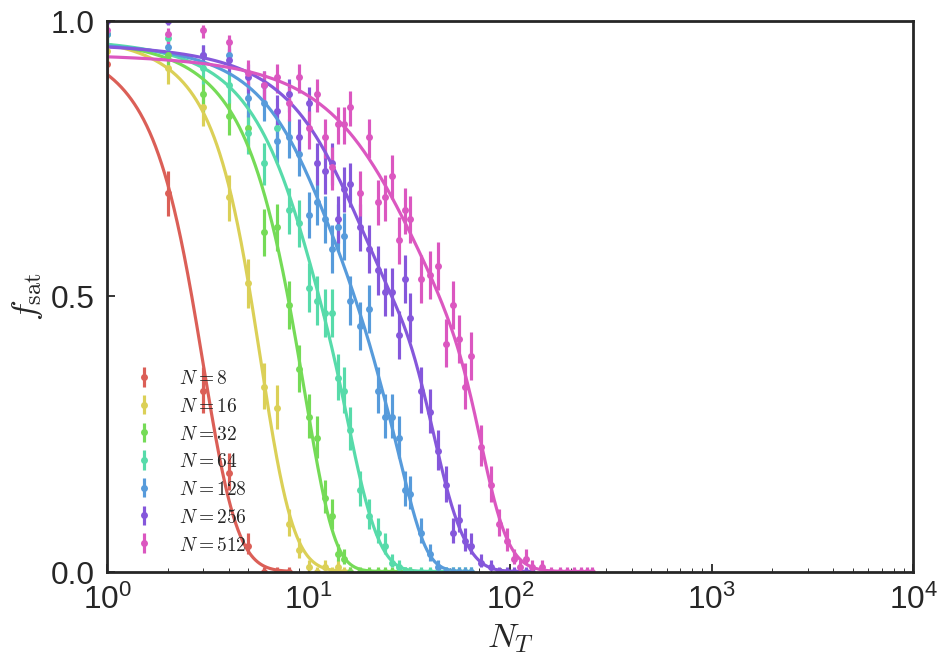

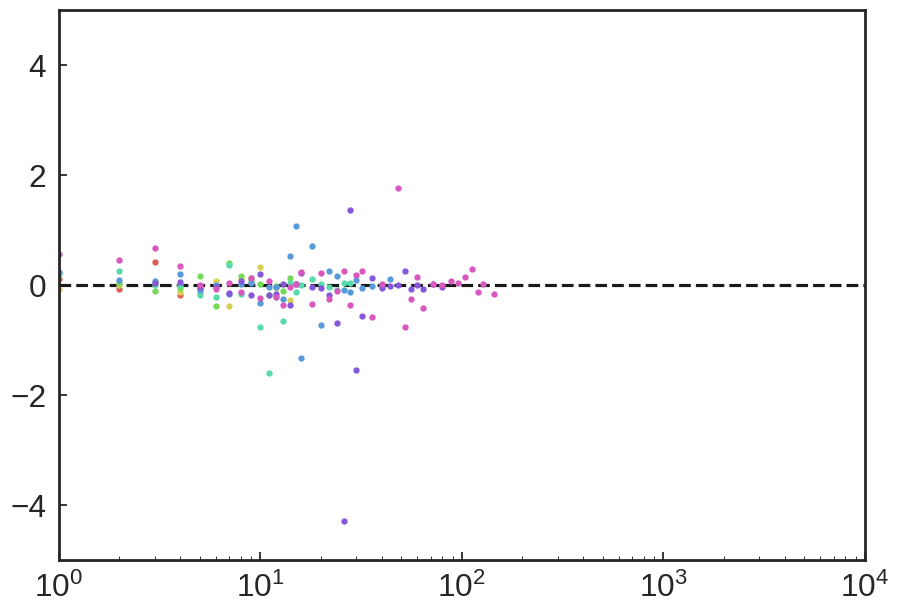

-1.0


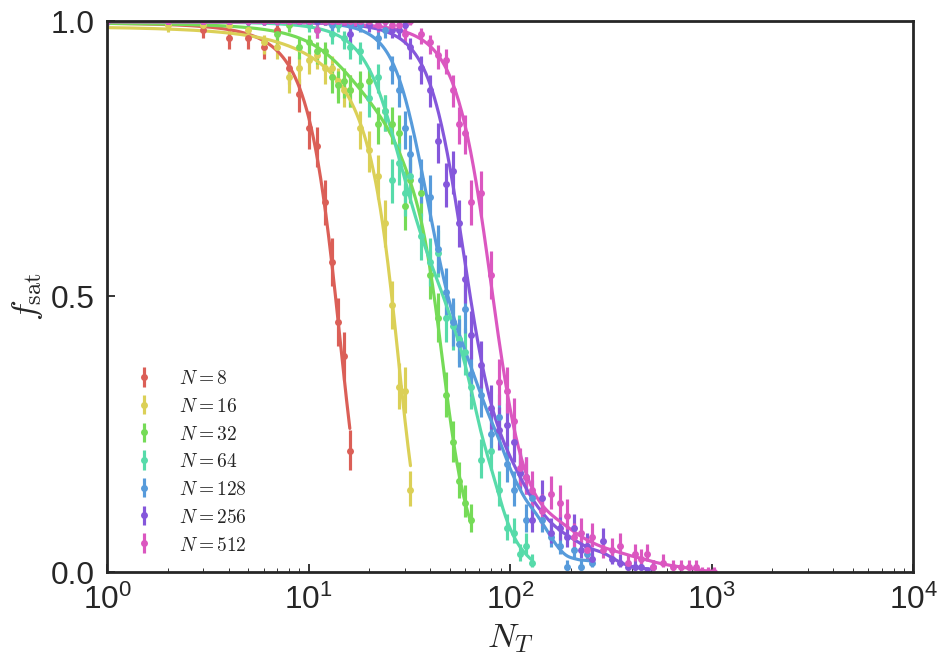

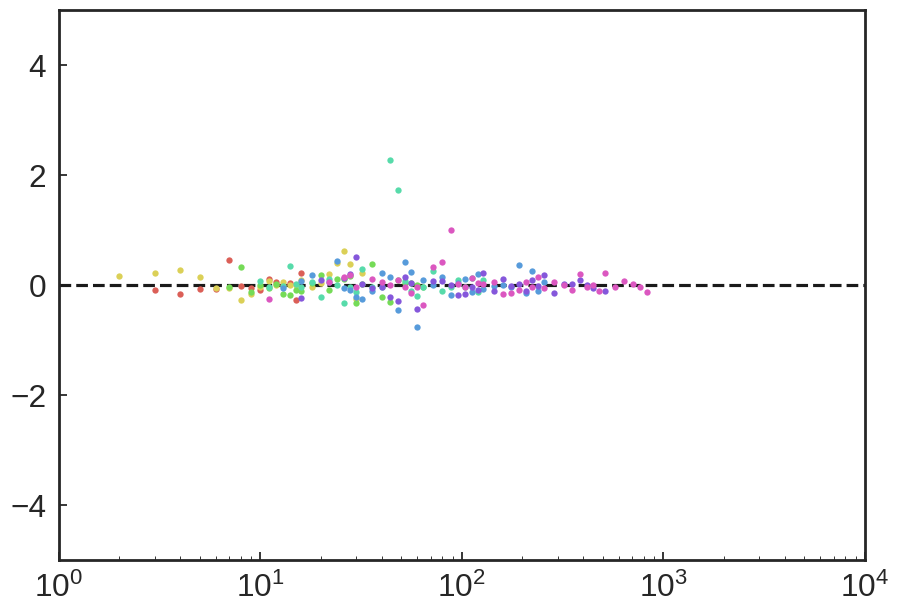

-0.5


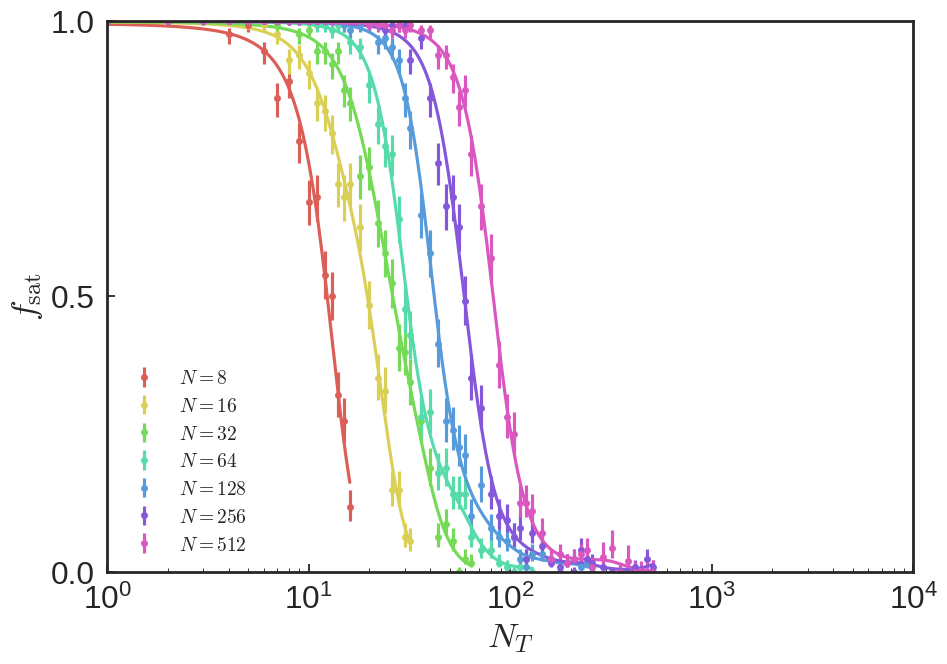

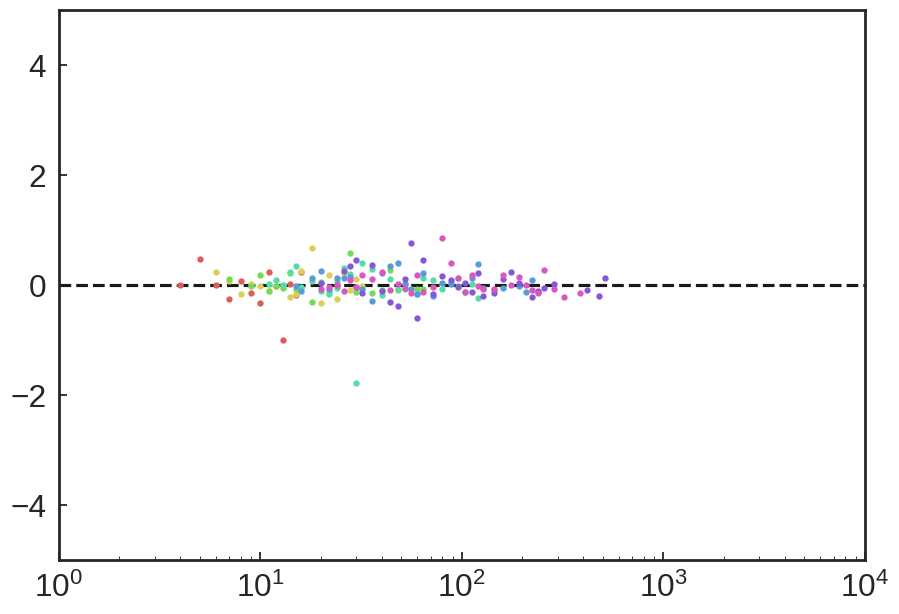

1.0


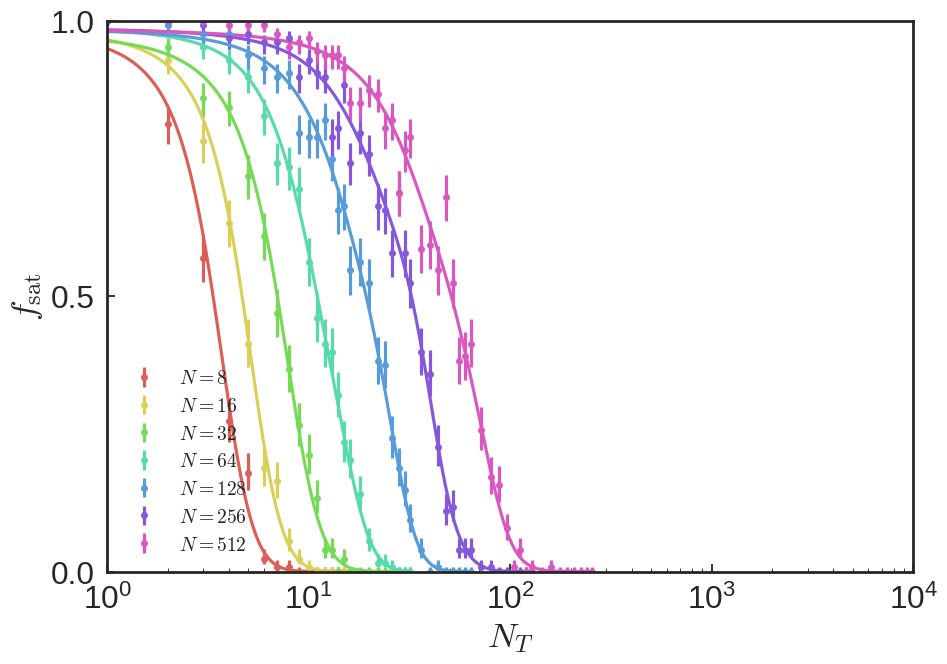

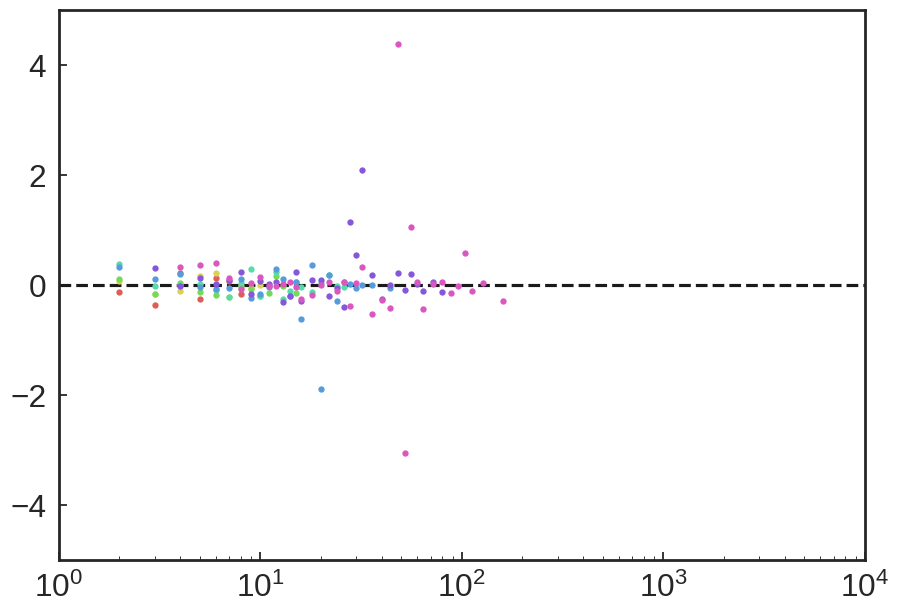

In [4]:
with open("{}.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df = data['df']

with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df']

for Delta, group0 in df.groupby(['eta']):

    print Delta
    
    palette = it.cycle(sns.color_palette("hls", len(group0.groupby('NN'))))

    fig, ax1 = plt.subplots(1,1)
    fig, ax2 = plt.subplots(1,1)

    for NN, group in group0.groupby(['NN']):

        color = next(palette)

        NT = np.array(group['NTS'])
        count = np.array(group['count'])
        fsat = np.array(group['fsat'])

        fsat_up = curve.wilson_up(fsat, count)
        fsat_low = curve.wilson_low(fsat, count)

        ax1.errorbar(NT, fsat, yerr=[fsat_low, fsat_up], fmt="o", 
                     color=color, markersize=5, label=r"$N={:}$".format(int(NN)))

        spline = df_fit.query("Delta=={} and NN=={}".format(Delta, NN)).iloc[0]['fit_func']
        expit = lambda x: sp.special.expit(spline(x))

        ax1.plot(np.linspace(0.1,np.max(NT), 1000), expit(np.linspace(0.1, np.max(NT), 1000)),
             '-', color=color)

        ax2.plot(NT, sp.special.logit(fsat)/spline(NT)-1.0, '.', color=color, label=r"$N={:}$".format(int(NN)))
#         ax2.plot(np.linspace(0.1,np.max(NT), 1000), spline(np.linspace(0.1, np.max(NT), 1000)), color=color)

    ax1.set_xlim(1e0, 1e4)
    ax1.set_ylim(0, 1)
    ax1.set_xscale('log')
    ax1.set_yticks([0.0, 0.5, 1.0])

    ax1.legend(loc="lower left", ncol=1, prop={'size':14})
    ax1.set_ylabel(r'$f_{\mathrm{sat}}$')
    ax1.set_xlabel(r'$N_T$')

    ax2.set_xlim(1e0, 1e4)
    ax2.set_xscale('log')
    ax2.set_ylim(-5, 5)
    ax2.hlines(0, 1e0, 1e4, 'k', linestyles='dashed')

    plt.show()
    

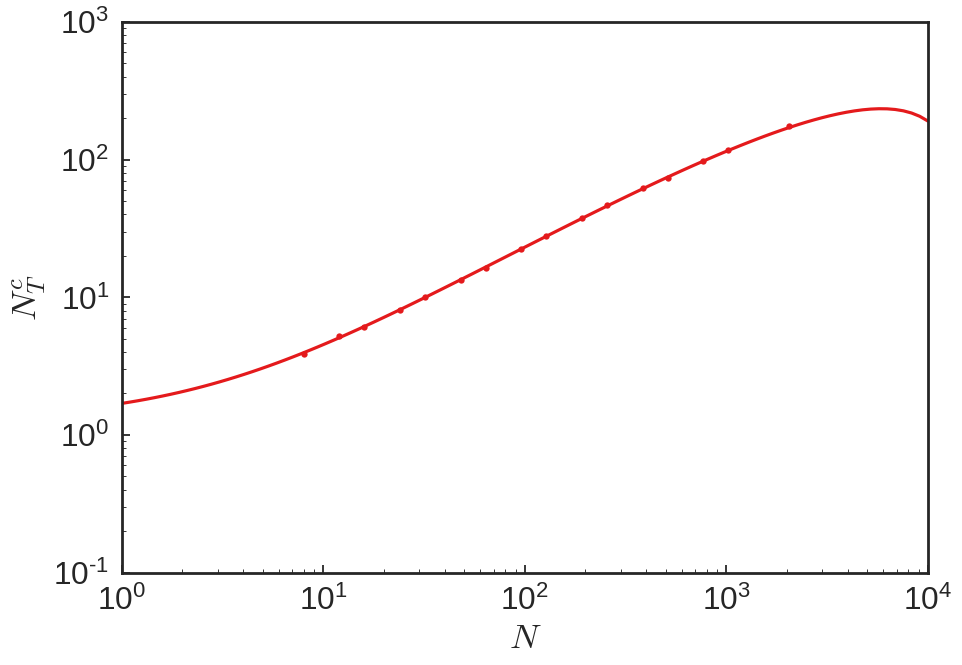

In [13]:
with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df']

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']

fig, ax1 = plt.subplots(1,1)

palette = it.cycle(sns.color_palette("Set1", 4))

for Delta, group in df_fit.groupby(['Delta']):
    
    color = next(palette)
    
    NN = np.array(group['NN'])

    NTc = np.array(group['NTc'])
    NTc_err = np.array(group['NTc_err'])
    
    ax1.errorbar(NN, NTc, yerr=NTc_err, fmt=".", color=color)
    
palette = it.cycle(sns.color_palette("Set1", 4))
for Delta, group in df_pow.groupby(['Delta']):
    
    color = next(palette)
    
    func = group.iloc[0]['NTc_fit_func']
    fit_param = group.iloc[0]['NTc_fit_param']

    ax1.plot(10**np.linspace(0, 4, 100), func(10**np.linspace(0,4, 100), *fit_param), '-', color=color)
    
    


ax1.set_xlim(1e0, 1e4)
ax1.set_ylim(1e-1, 1e3)

ax1.set_xlabel("$N$")
ax1.set_ylabel(r"$N_T^c$")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc="upper left", prop={'size':10})


plt.show()

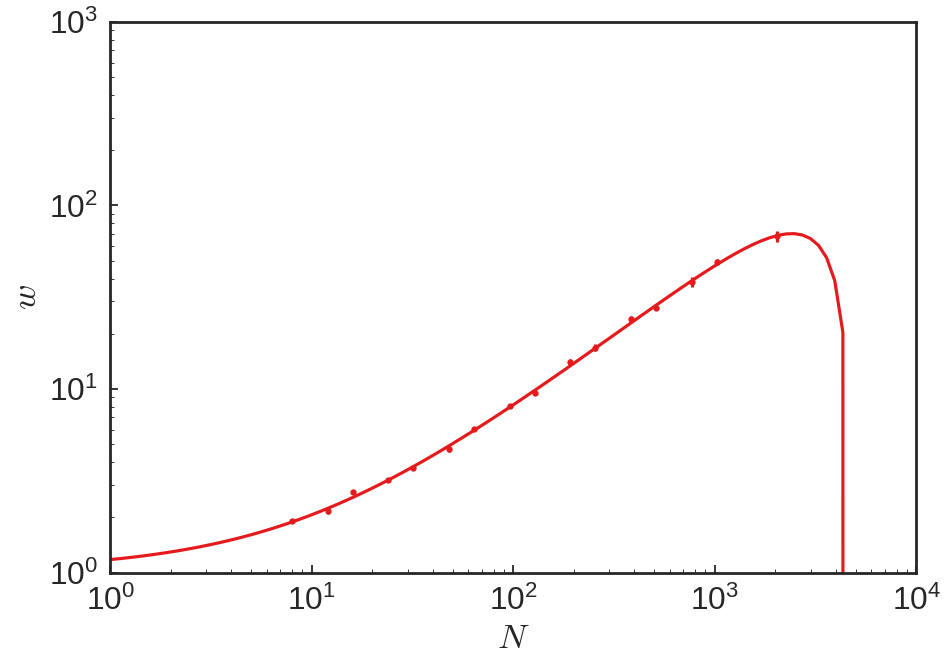

In [23]:
with open("{}_fsat_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_fit = data['df']

with open("{}_power_fit.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df_pow = data['df']

fig, ax1 = plt.subplots(1,1)

palette = it.cycle(sns.color_palette("Set1", 4))

for Delta, group in df_fit.groupby(['Delta']):
    
    color = next(palette)
    
    NN = np.array(group['NN'])

    width = np.array(group['width'])
    width_err = np.array(group['width_err'])
    
    ax1.errorbar(NN, width, yerr=width_err, fmt=".", color=color)
    
palette = it.cycle(sns.color_palette("Set1", 4))
for Delta, group in df_pow.groupby(['Delta']):
    
    color = next(palette)
    
    func = group.iloc[0]['width_fit_func']
    fit_param = group.iloc[0]['width_fit_param']

    ax1.plot(10**np.linspace(0, 4, 100), func(10**np.linspace(0,4, 100), *fit_param), '-', color=color)
    
    


ax1.set_xlim(1e0, 1e4)
ax1.set_ylim(1e0, 1e3)

ax1.set_xlabel("$N$")
ax1.set_ylabel(r"$w$")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc="upper left", prop={'size':10})


plt.show()

In [3]:
fn = "tune_disc_1D_edge_default"

df = pd.read_csv("pressure_edge_sat_counts.csv.gz").query("target_strength==0.1")

NN = np.array(df['nodes'])
eta = np.array(df['target_strength'])
NTS = np.array(df['targets'])
count = np.array(df['counts'])
fsat = np.array(df['sats']) / count

df_conv = pd.DataFrame({'eta': eta, 'NN': NN, 'NTS': NTS, 'count': count, 'fsat': fsat}, dtype=float)

data = {'df': df_conv}

with open("{}.pkl".format(fn), 'wb') as pkl_file:
    pickler = pickle.Pickler(pkl_file, -1)
        
    pickler.dump(data)

    
df = pd.read_csv("pressure_edge_sat_counts.csv.gz").query("target_strength!=0.1")

# print df
    

    
fn = "tune_disc_1D_nodepair_default"

df = pd.read_csv("pressure_node_pair_sat_counts.csv.gz").query("target_strength==0.1")

NN = np.array(df['nodes'])
eta = np.array(df['target_strength'])
NTS = np.array(df['targets'])
count = np.array(df['counts'])
fsat = np.array(df['sats']) / count

df_conv = pd.DataFrame({'eta': eta, 'NN': NN, 'NTS': NTS, 'count': count, 'fsat': fsat}, dtype=float)

data = {'df': df_conv}

with open("{}.pkl".format(fn), 'wb') as pkl_file:
    pickler = pickle.Pickler(pkl_file, -1)
        
    pickler.dump(data)

In [3]:

# def overlapMat(m, t, k):
    
#     if k == 3:
    
#         B1B1 = np.zeros([m+2, m+2], float)
#         B1B1[k:m,k:m] += 1.0/3.0 * np.diag(t[k+1:m+1] - t[k:m])
#         B1B1[k-1:m-1,k-1:m-1] += 1.0/3.0 * np.diag(t[k+1:m+1] - t[k:m])
#         B1B1[k-1:m,k-1:m] += 1.0/6.0*np.diag(t[k+1:m+1] - t[k:m], -1)
#         B1B1[k-1:m,k-1:m] += 1.0/6.0*np.diag(t[k+1:m+1] - t[k:m], 1)

#         A = np.zeros([3, m], float)

#         hh = (t[3:m+3] - t[0:m])*(t[2:m+2] - t[0:m])
#         A[0, hh.nonzero()] = 6.0 / hh[hh.nonzero()]
#         hh = (t[3:m+3] - t[0:m])*(t[3:m+3] - t[1:m+1])
#         A[1, hh.nonzero()] += -6.0 / hh[hh.nonzero()]
#         hh = (t[4:m+4] - t[1:m+1])*(t[3:m+3] - t[1:m+1])
#         A[1, hh.nonzero()] += -6.0 / hh[hh.nonzero()]
#         hh = (t[4:m+4] - t[1:m+1])*(t[4:m+4] - t[2:m+2])
#         A[2, hh.nonzero()] = 6.0 / hh[hh.nonzero()]

#         Sigma = np.zeros([m,m], float)
#         for i in range(m):
#             for j in range(i, m):
#                 Sigma[i, j] = A[:, i].dot(B1B1[i:i+3, j:j+3].dot(A[:, j]))
#                 Sigma[j, i] = Sigma[i, j]
                
#     else:
        
#         Sigma = np.zeros([m,m], float)
    
#         for i in range(m):
#             ci = np.zeros(m, float)
#             ci[i] = 1.0
#             for j in range(i, np.min([i+k+1, m])):
#                 cj = np.zeros(m, float)
#                 cj[j] = 1.0

#                 integrand = lambda x: spi.BSpline(t, ci, k).derivative(2)(x) * spi.BSpline(t, cj, k).derivative(2)(x)
#                 Sigma[i, j] = spint.quad(integrand, t[k+1], t[n - k - 1])[0]
#                 Sigma[j, i] = Sigma[i, j]
        
                
#     sSigma = sparse.csc_matrix(Sigma)
                
#     return sSigma

# def evalBasis(m, t, k):
    
#     Bitj = np.zeros([m, len(t)-2*k], float)
#     for i in range(m):
#         c = np.zeros(m, float)
#         c[i] = 1.0
#         spline = spi.BSpline(t, c, k)
#         Bitj[i] = spline(t[k:len(t)-k])

# #     sX = sparse.csc_matrix(Bitj.transpose())
        
#     return Bitj.transpose()                   

# # def CV_obj(lam, x, y, dist_param, penalty, penalty_grad, k, t, c0):
        
# #     cv_obj = 0.0

# # #     fig, ax = plt.subplots(1,1)
# #     for i in range(len(x)):

# #         x0 = np.delete(x, i)
# #         y0 = np.delete(y, i)
# #         dist_param0 = np.delete(dist_param, i)
        
# #         ix = np.arange(len(x))
# #         ix0 = np.delete(ix, i)
        
# #         args=(ix0, y0, dist_param0, lam)
# #         c = min_penalty(penalty, penalty_grad, c0, args)
        
# #         fx  = spi.BSpline(t, c, k)(x[i])

# #         n = dist_param[i]
# #         p = 1.0 * y[i] / n
        
# #         cv_obj += n * (np.log(1+np.exp(fx)) - p*fx)
                
# # #         ax.plot(np.linspace(x[0], x[-1], 1000), spline(np.linspace(x[0], x[-1], 1000)), '-', label="{}".format(i))
        
# # #     ax.plot(x, sp.special.erfinv(1- 2.0 *1.0 *y / dist_param), 'o')
# # #     ax.legend()
# # # #     ax.set_ylim(-0.1, 1.1)
# # #     plt.show()

# #     cv_obj /= len(x) 


# #     return cv_obj

# def GCV_approx_obj(lam, x, y, dist_param, penalty, penalty_grad, k, t, c0, Sigma, X):
        
        
#     gamma = np.exp(lam)
    
# #     print lam
    
#     args=(y, dist_param, gamma)
#     c = min_penalty(penalty, penalty_grad, c0, args)
        
#     fx = X.dot(c)
        
#     mu = dist_param * sp.special.expit(fx)
#     D = dist_param * sp.special.expit(fx)**2.0 * np.exp(-fx)
#     DhalfX = np.diag(np.sqrt(D)).dot(X)
    
#     # factor of 2 * lambda * M might be off
    
#     M = DhalfX.transpose().dot(DhalfX) + 2.0 * gamma * Sigma
    
#     Minv = la.inv(M)
    
#     A = DhalfX.dot(Minv).dot(DhalfX.transpose())
                
#     cv_obj = np.sum(1.0/D * (y - mu)**2.0) / len(y) / (1.0 - np.trace(A) / len(y))**2.0

# #     cv_obj = np.sum(1.0/D * (y - mu)**2.0 / (1.0 - np.diag(A))**2.0) / len(y)
        
#     return cv_obj


# def min_penalty(penalty, penalty_grad, c0, args):
#     res = spo.minimize(penalty, c0, jac=penalty_grad, args=args,
#            method='BFGS', options={'gtol': np.sqrt(np.finfo(float).eps)})
    
#     # print res
    
#     return res.x


# # def min_CV(x0, args):
# #     alpha = 0.1
# #     beta1 = 0.9
# #     beta2 = 0.999
# #     eps = 1e-4  
    
# #     x = x0
# #     m = 0.0
# #     v = 0.0
    
# #     for t in range(1000):
# #         g = (CV_obj(x+eps, *args) - CV_obj(x-eps, *args)) / (2.0*eps)
        
# #         print t, x, CV_obj(x, *args), g
# #         if np.abs(g) < eps:
# #             return x
                
# #         m = beta1 * m + (1.0-beta1) * g
# #         v = beta2 * v + (1.0-beta2) * g*g
# #         mhat = m / (1.0-beta1**(t+1))
# #         vhat = v / (1.0-beta2**(t+1))
# #         x -= alpha * mhat / (np.sqrt(vhat) + eps)
    
# #     return x
    
# def min_CV(lam0, args):

#     res = spo.minimize(CV_obj, [lam0], jac=None, args=args,
#                        method='L-BFGS-B', options={'ftol': np.sqrt(np.finfo(float).eps), 
#                                            'gtol': 1e-4, 'eps':1e-4}, bounds=[(1e-4, None)])

#     print res
    
#     return res.x


# def min_GCV(lam0, args):

#     res = spo.minimize_scalar(GCV_approx_obj,bounds=(1.0, 20.0), args=args, method='bounded', tol=1e-4)

#     print res
    
#     return res.x


# def lossBinom(y, n, fx):
    
#     p = 1.0 * y / n
#     eps = np.finfo(float).eps
    
#     return np.sum( n * (np.log(1.0 + np.exp(fx)) - p*fx) ) / len(y)
    
# def lossBinom_grad(y, n, fx):
    
#     p = 1.0 * y / n
#     eps = np.finfo(float).eps
    
#     return n * (sp.special.expit(fx) - p ) / len(y)
    
# def lossGauss(y, sigma, fx):
    
#     return np.sum((y - fx)**2 / sigma**2) / len(y)
   

# def curveFitSpline(x, y, dist_param, dist="gauss", lam0=0.0, CV=True): 
    
#     k = 3
        
#     n = 2*k + len(x)
    
#     m = n - (k+1)
    
        
#     t = np.zeros(n, float)
#     t[0:k] = x[0] 
#     t[n-k-1:] = x[-1]
#     t[k:n-k] = x
    
#     Sigma = overlapMat(m, t, k)
#     X = evalBasis(m, t, k)

#     def obj(c, y, dist_param):
#         fx = X.dot(c)
    
#         return lossBinom(y, dist_param, fx)
    
#     def obj_grad(c, y, dist_param):
#         fx = X.dot(c)
        
#         g = lossBinom_grad(y, dist_param, fx) 
        
#         return X.transpose().dot(g)
        
        
#     smooth = lambda c: c.dot(Sigma.dot(c))
#     penalty = lambda c,  y, dist_param, lam: obj(c, y, dist_param) + lam * smooth(c)
    
#     smooth_grad = lambda c: 2.0 * Sigma.dot(c)
    
#     penalty_grad = lambda c,  y, dist_param, lam: obj_grad(c, y, dist_param) + lam * smooth_grad(c)
       
#     c0 = np.zeros(m, float)
    
#     args=(y, dist_param, lam0)  
    
#     print "check grad", spo.check_grad(penalty, penalty_grad, c0, *args) 
    
    
#     c0 = min_penalty(penalty, penalty_grad, np.copy(c0), args)
       
        
# #     fig, ax = plt.subplots(1,1)
        
# # #     lam_list = np.logspace(-4, 6, 32)
# #     lam_list = np.linspace(1.0, 20, 32)
    
# #     cv_list = []
# #     for i in lam_list:
# #         cv_list.append(CV_obj(np.exp(i), x, y, dist_param, penalty, penalty_grad, k, t, c0))
# # #         cv_list.append(GCV_approx_obj(i, x, y, dist_param, penalty, penalty_grad, k, t, c0, M, Bitj))
# #     ax.plot(lam_list, cv_list)
    
# #     cv_list = []
# #     for i in lam_list:
# # #         cv_list.append(CV_obj(i, x, y, dist_param, penalty, penalty_grad, k, t, c0))
# #         cv_list.append(GCV_approx_obj(i, x, y, dist_param, penalty, penalty_grad, k, t, c0, M, Bitj))
# #     ax.plot(lam_list, cv_list)
    
# #     lam0 = lam_list[np.argmin(cv_list)]
    
# #     print lam0
    
# #     ax.set_xscale('log')
# #     ax.set_yscale('log')
        
        
#     if CV:
        
# #         args = (x, y, dist_param, penalty, penalty_grad, k, t, c0)
# #         lam = min_CV(lam0, args)

#         args = (x, y, dist_param, penalty, penalty_grad, k, t, c0, Sigma, X)
#         lam = min_GCV(lam0, args)
        
#         args=(y, dist_param, lam)  
#         c = min_penalty(penalty, penalty_grad, c0, args)
        
#     else:
#         lam = lam0
#         c = c0


# #     print "gcv", GCV_approx_obj(lam0, x, y, dist_param, penalty, penalty_grad, k, t, c0, M, Bitj)
    
#     print "Lambda:", np.exp(lam)
    
#     print "Residuals", obj(c0, y, dist_param), obj(c, y, dist_param)
#     print "Smoothness", smooth(c0), smooth(c)
        
#     spline = spi.BSpline(t, c, k)
        
#     return spline

# def calcTransition(spline):
    
# #     fcenter = sp.special.logit(0.5)
# #     flow = sp.special.logit(0.25)
# #     fup = sp.special.logit(0.75)
    
#     fcen = 0.0
#     flow = np.log(3.0)
#     fup = -np.log(3.0)
    
#     func = lambda x: spline(x) - fcen
#     xcen = spo.brentq(func, 0, 1e3)
    
#     func = lambda x: spline(x) - flow
#     xlow = spo.brentq(func, 0, 1e3)
    
#     func = lambda x: spline(x) - fup
#     xup = spo.brentq(func, 0, 1e3)
        
#     print flow, fup
#     print xlow, xup
        
#     width = xup - xlow
        
#     print xcen, width



8.0
(18.240000000000002, 20.240000000000002)
Lambda: 19.2040259799 218878202.454
Residuals 44.7491152935 44.756333755
Smoothness 0.000837723145104 0.00021351647509
931.518 ms


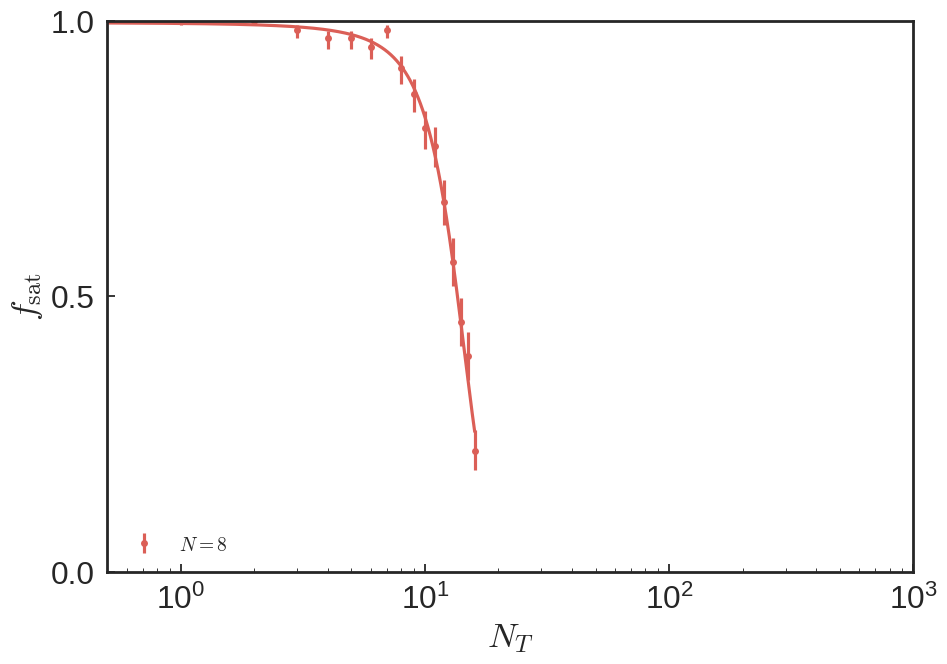

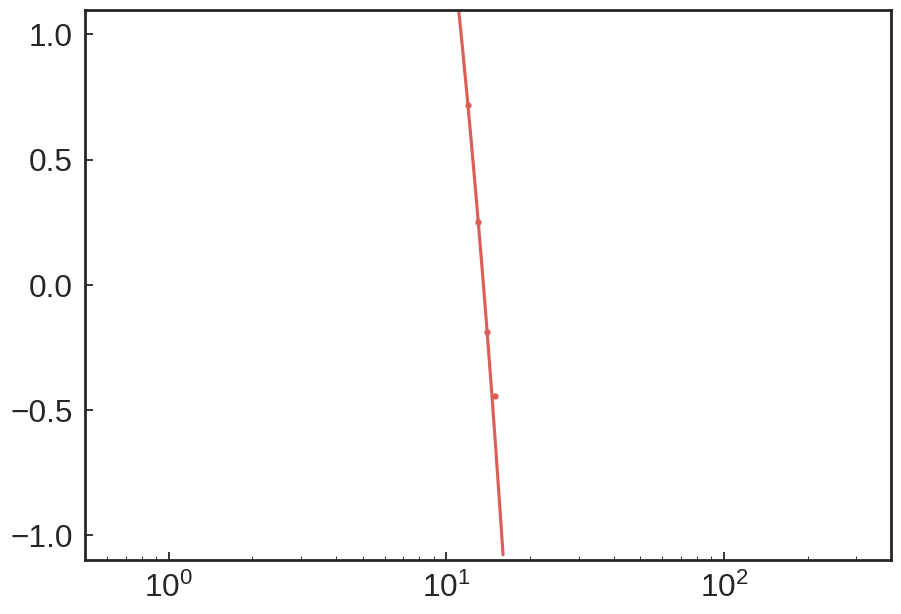

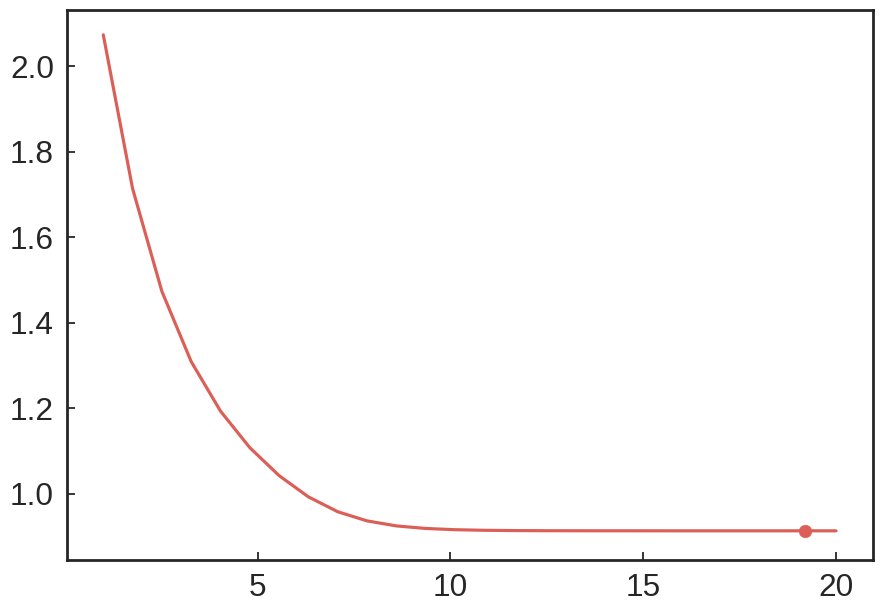

In [8]:
with open("{}.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
    df = data['df'].query('eta == -1.0 and NN==8')
#     df = data['df'].query('eta == 0.1 and (NN == 2048)')
    
    palette = it.cycle(sns.color_palette("hls", 8))

    
    fig, ax1 = plt.subplots(1,1)
    
    fig, ax2 = plt.subplots(1,1)
    
    for NN, group in df.groupby(['NN']):

        print NN
        
        color = next(palette)
        
        NT = np.array(group['NTS'])
        count = np.array(group['count'])
        fsat = np.array(group['fsat'])
        
        fsat_up = curve.wilson_up(fsat, count)
        fsat_low = curve.wilson_low(fsat, count)

        ax1.errorbar(NT, fsat, yerr=[fsat_low, fsat_up], fmt="o", 
                     color=color, markersize=5, label=r"$N={:}$".format(int(NN)))
    
        time1 = time.time()
        spline = curve.curveFitSpline(NT, fsat*count, count, CV=True, lam0=8.0, dist="binom")
        time2 = time.time()
        print '{:.3f} ms'.format((time2-time1)*1000.0)
        
#         curve.calcTransition(spline, np.min(NT), np.max(NT))
                
        expit = lambda x: sp.special.expit(spline(x))
        
        ax1.plot(np.linspace(0.1,np.max(NT), 1000), expit(np.linspace(0.1, np.max(NT), 1000)),
             '-', color=color)
        
        ax2.plot(NT, sp.special.logit(fsat), '.', color=color, label=r"$N={:}$".format(int(NN)))
        ax2.plot(np.linspace(0.1,np.max(NT), 1000), spline(np.linspace(0.1, np.max(NT), 1000)), color=color)

    ax1.set_xlim(5e-1, 1e3)
    ax1.set_ylim(0, 1)
    ax1.set_xscale('log')
    ax1.set_yticks([0.0, 0.5, 1.0])

    ax1.legend(loc="lower left", ncol=1, prop={'size':14})
    ax1.set_ylabel(r'$f_{\mathrm{sat}}$')
    ax1.set_xlabel(r'$N_T$')
    
    ax2.set_xlim(5e-1, 400)
    ax2.set_xscale('log')
#     ax2.set_ylim(-25, 25)
    ax2.set_ylim(-np.log(3.0), np.log(3.0))
    
    plt.show()
    

[ 0.  0.  0.  0.  1.  2.  3.  4.  5.  5.  5.  5.]


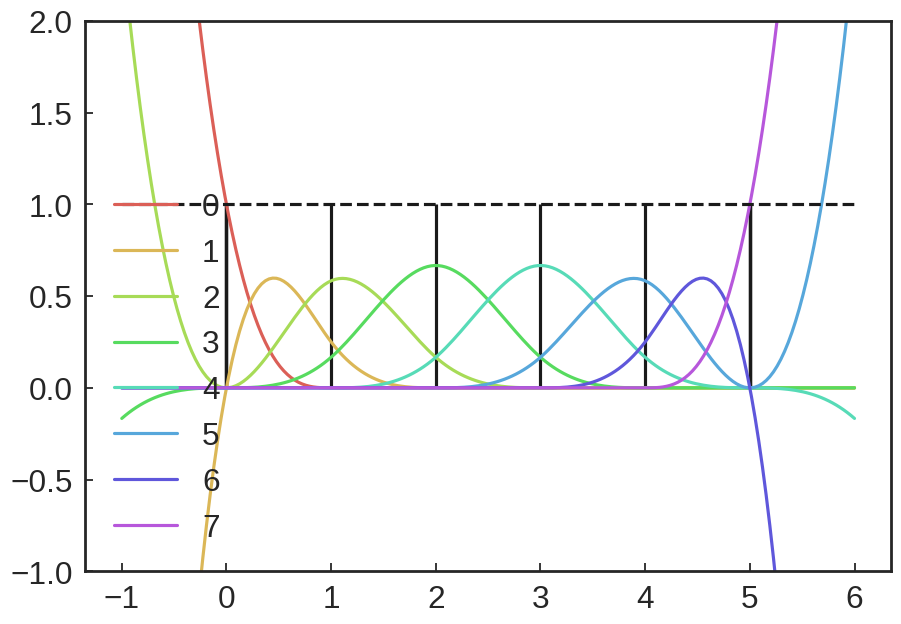

In [22]:
fig, ax1 = plt.subplots(1,1)

k = 3
n = 12
m = n - (k+1)

t = np.zeros(n, float)
# t[:k] = 0.2*np.arange(-k, 0)
t[:k] = 0
t[k:m+1] = np.arange(m-k+1)
# t[m+1:] = m-k+0.2*np.arange(1,k+1)
t[m+1:] = m-k
print t


x = np.linspace(t[0]-1, t[-1]+1, 200)
y = np.zeros(len(x), float)
for i in range(m):
    
    c = np.zeros(m, float)
    c[i] = 1.0
    
#     if i == n-1 or i == 0:
#         c[i] = 0.8
    
    spline = spi.BSpline(t, c, k, True)    
    y += spline(x)
    ax1.plot(x, spline(x), '-', label="{}".format(i))
    
#     ax1.plot(x, spline.derivative(2)(x), '-', label="{}".format(i))
    
    

ax1.plot(x, y, 'k--')
    
ax1.vlines(t, 0, 1, color='k')

ax1.set_ylim(-1, 2)
ax1.legend()

plt.show()